# **E-COMMERCE CUSTOMER CHURN ANALYSIS & PREDICTION MODEL**

for Purwadhika Final Project | Group Beta JCDSAH-0104

***


## **Business Problem Understanding**

### Context:

Tungtungpedia merupakan perusahaan e-commerce yang menjual berbagai macam barang dengan kategori yang beragam. Mulai dari barang elektronik, fashion, bahkan hingga bahan makanan/ kebutuhan dapur. Tungtungpedia hadir sebagai platform yang menjembatani transaksi antara penjual dan pembeli, memberikan solusi belanja online yang cepat, aman, dan efisien untuk memenuhi kebutuhan pelanggan.

Namun demikian, pada era serba digital Tungtungpedia bukanlah satu-satunya e-commerce yang menawarkan solusi ini. Persaingan menuntut perusahaan untuk terus menyesuaikan strategi agar bisa bertahan di pasar yang kompetitif. Mulai dari kualitas layanan hingga retensi pelanggan. Untuk mengetahui strategi paling tepat, sebaiknya dianalisa secara terukur dengan berbasis data agar perusahaan dapat berjalan dengan berkelanjutan dan mampu tumbuh dalam jangka panjang.

Dalam dunia bisnis, menjalankan perusahaan tentu memiliki tantangannya masing-masing. Bagi Tungtungpedia, salah satu tantangan yang dihadapi saat ini adalah retensi pelanggan. Dalam lingkup digital yang sangat dinamis, pelanggan memiliki banyak pilihan dan dapat dengan mudah berpindah ke platform lain dan berhenti menggunakan layanan platform Tungtungpedia.

Pelanggan yang berhenti menggunakan layanan ini dapat disebut sebagai pelanggan **churn**. Mengutip dari sebuah [artikel IBM]('https://www.ibm.com/id-id/think/topics/customer-churn'), "Churn pelanggan adalah jumlah pelanggan lama yang hilang, karena alasan apa pun, selama periode waktu tertentu. Hal ini memberikan pemahaman kepada perusahaan mengenai kepuasan pelanggan dan loyalitas pelanggan, serta dapat mengidentifikasi potensi perubahan pada keuntungan perusahaan".

Untuk menanggulangi tantangan ini secara terukur, diperlukan juga pendekatan prediktif berbasis machine learning. Keunggulan model machine learning adalah dapat mengidentifikasi data kompleks dengan volume besar, dimana akan sangat sulit jika dilihat secara langsung dan analisa manual. Dari data historis yang dimiliki Tungtungpedia, model klasifikasi dapat digunakan untuk mengidentifikasi pola-pola pelanggan yang berpotensi churn sejak dini.


### Classification Characteristic:

Model ini dikembangkan untuk memprediksi apakah seorang nasabah berpotensi untuk melakukan churn (positif) atau tidak (negatif), berdasarkan data historis:
* Kelas Positif (1): Pelanggan melakukan churn.
* Kelas Negatif (0): Pelanggan tidak melakukan churn.

Dengan pendekatan klasifikasi, model akan dibangun, dilatih, dan dievaluasi berdasarkan seberapa baik model bisa membedakan pelanggan yang akan churn atau tidak. Kemudian output dari model dapat dijadikan landasan dalam pembuatan strategi campaign retensi oleh team sales & marketing.

### Problem Statement:

Strategi pemasaran yang tidak ditargetkan secara akurat dapat menyebabkan:
* Efektivitas kampanye yang rendah karena salah sasaran
* Pemborosan anggaran, waktu, dan sumber daya team marketing
* Kehilangan potensi pendapatan akibat churn yang tidak terdeteksi dari awal

Stakeholder utama dari permasalahan ini adalah team sales & marketing, yang bertanggung jawab terhadap campaign retensi pelanggan dan efisiensi anggaran pemasaran.

### Goals:

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk bisa memprediksi kemungkinan pengguna yang akan churn atau tidak, sehingga bisa dengan tepat menerapkan strategi marketing untuk mencegah pengguna agar tidak churn. Perusahaan juga ingin mengetahui faktor apa saja yang menyebabkan pengguna churn atau tidak, sehingga dapat membuat strategi marketing yang tepat untuk diberikan kepada pengguna.

Sebagai team data analis & scientist, tugas team disini untuk membantu perusahaan dalam memahami perilaku pengguna, mengidentifikasi pola potensi churn, serta memberikat insight untuk mendukung pengambilan keputusan.

Yang akan dilakukan team:
* Menganalisis data pelanggan e-commerce
* Mengidentifikasi fitur penting dan pola korelasi terhadap churn dari data yang sudah ada
* Membangun model machine learning untuk memprediksi potensi churn
* Memberikan rekomendasi terukur berdasarkan hasil analisis untuk mendukung kampanye retensi dan efisiensi

Team akan menggunakan SMART goals/approach, antara lain:
* S (Specific): Mengidentifikasi pelanggan dengan kemungkinan tinggi churn dan menyusun strategi marketing yang sesuai
* M (Measurable): Mencapai minimal akurasi prediksi machine learning hingga >80%.
* A (Achievable): Menggunakan data historis pelanggan serta membangun model klasifikasi untuk memprediksi churn
* R (Relevant): Relevan untuk meningkatkan efisiensi pemasaran dan mempertahankan pelanggan (retensi)
* T (Time-bound): Implementasi strategi marketing dijadwalkan secepatnya setelah model terbaik didapatkan.

### Evaluation Metrics:
- Type 1 Error : False Positive

  Model memprediksi pengguna churn, padahal tidak churn

Konsekuensi : Strategi marketing yang dilakukan tidak tepat sasaran. Jika hal tersebut terjadi dan diasumsikan biaya untuk retensi sebesar Rp100.000, maka perusahaan perlu mengeluarkan Rp100.000 per orang yang terprediksi.
<br>
<br>
- Type 2 Error : False Negative

  Model memprediksi tidak churn, padahal sebenarnya akan churn

Konsekuensi : Kehilangan pengguna aplikasi. Jika hal tersebut terjadi dan diasumsuikan biaya untuk akuisisi pelanggan ulang sebesar Rp400.000 [sumber](https://www.shopify.com/in/enterprise/blog/lower-customer-acquisition-costs?utm_source=chatgpt.com), maka perusahaan perlu mengeluarkan Rp400.000 per orang yang akan diakuisisi.
<br>
<br>
Berdasarkan dua risiko/konsekuensi tersebut, resiko terbesar adalah kehilangan pengguna (FN). Maka pemilihan metrik yang dirasa sesuai melainkan:
* Recall -> Model yang sensitif menangkap sebanyak mungkin pelanggan yang benar-benar churn
* F1-Score -> menyeimbangkan antar precision dan recall, jadi cocok jika ingin tetap efisien dalam biaya pemasaran (tidak terlalu banyak FP)
***

## **Data Understanding**


### Dataset Info

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy.stats import normaltest, ttest_ind, f_oneway, mannwhitneyu
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel("C:\\Users\\user\\Downloads\\E Commerce Dataset.xlsx", sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Dataset Info:

Numerikal (float64 & int64)
- CustomerID: Informasi unik ID pelanggan
- Churn: Keterangan churn atau tidak
- Tenure: Lama pelanggan melakukan layanan (Bulan)
- CityTier: Tier Kota
- WarehouseToHome: Jarak antara warehouse ke rumah pelanggan (Km)
- HourSpendOnApp: Waktu yang dihabiskan pelanggan dalam aplikasi (Jam)
- NumberOfDeviceRegistered: Jumlah total perangkat yang terdaftar pada pelanggan tertentu
- SatisfactionScore: Skor kepuasan pelanggan terhadap layanan.
- NumberOfAddress: Jumlah alamat yang ditambah oleh pelanggan
- Complain: Complain yang dilakukan klien sebulan terakhir
- OrderAmountHikeFromLastYear: Persentase kenaikan order dari tahun lalu
- CouponUsed: Jumlah kupon yang digunakan sebulan terakhir
- OrderCount: Jumlah pesanan yang dilakukan sebulan terakhir
- DaySinceLastOrder: Hari terhitung setelah pemesanan terakhir oleh pelanggan
- CashbackAmount: Rata-rata uang kembali sebulan terakhir

Kategorikal (object)
- PreferredLoginDevice: Device yang digunakan pelanggan untuk login
- PreferredPaymentMode: Metode pembayaran yang dipilih oleh customer
- Gender: Jenis kelamin pelanggan
- PreferedOrderCat: Kategori pesanan yang paling disukai pelanggan pada bulan lalu.
- MaritalStatus: Status pernikahan

* Data berisikan total 20 kolom dan 5630 baris. Terdapat 7 kolom berisikan missing value, antara lain pada:

Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder.
* Ada beberapa kolom yang seharusnya kategori seperti churn, citytier, dan satisfaction score. Kolom tersebut nantinya akan diganti tipe datanya menjadi object.
* Kolom CustomerID akan dihapus karena tidak diperlukan dalam analisis

In [6]:
# melihat unique
pd.set_option('display.max_colwidth', 0)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,CustomerID,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50076, 50077, 50078, 50079, 50080, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, ...]"
1,Churn,2,"[1, 0]"
2,Tenure,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 14.0, 8.0, 18.0, 5.0, 2.0, 30.0, 1.0, 23.0, 3.0, 29.0, 6.0, 26.0, 28.0, 7.0, 24.0, 25.0, 10.0, 15.0, 22.0, 27.0, 16.0, 12.0, 21.0, 17.0, 50.0, 60.0, 31.0, 51.0, 61.0]"
3,PreferredLoginDevice,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,3,"[3, 1, 2]"
5,WarehouseToHome,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, 31.0, 18.0, 13.0, 20.0, 29.0, 28.0, 26.0, 14.0, nan, 10.0, 27.0, 17.0, 23.0, 33.0, 19.0, 35.0, 24.0, 16.0, 25.0, 32.0, 34.0, 5.0, 21.0, 126.0, 7.0, 36.0, 127.0]"
6,PreferredPaymentMode,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card]"
7,Gender,2,"[Female, Male]"
8,HourSpendOnApp,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,6,"[3, 4, 5, 2, 1, 6]"


ada value unique di beberapa kolom yang namanya seharusnya sama seperti:
1. PreferredLoginDevice : mobile phone dan phone akan disamakan namanya menjadi mobile phone.
2. PreferredPaymentMode : COD dan cash on delivery akan disamakan namanya menjadi COD & Credit Card akan disamakan menjadi CC.
3. PreferedOrderCat : mobile phone dan mobile akan disamakan namanya menjadi mobile phone.

## EDA

### Check Distribusi

Mengecek distribusi menggunakan normal test

kolom CustomerID tidak terdistribusi normal
kolom Churn tidak terdistribusi normal
kolom Tenure terdistribusi normal
kolom CityTier tidak terdistribusi normal
kolom WarehouseToHome terdistribusi normal
kolom HourSpendOnApp terdistribusi normal
kolom NumberOfDeviceRegistered tidak terdistribusi normal
kolom SatisfactionScore tidak terdistribusi normal
kolom NumberOfAddress tidak terdistribusi normal
kolom Complain tidak terdistribusi normal
kolom OrderAmountHikeFromlastYear terdistribusi normal
kolom CouponUsed terdistribusi normal
kolom OrderCount terdistribusi normal
kolom DaySinceLastOrder terdistribusi normal
kolom CashbackAmount tidak terdistribusi normal


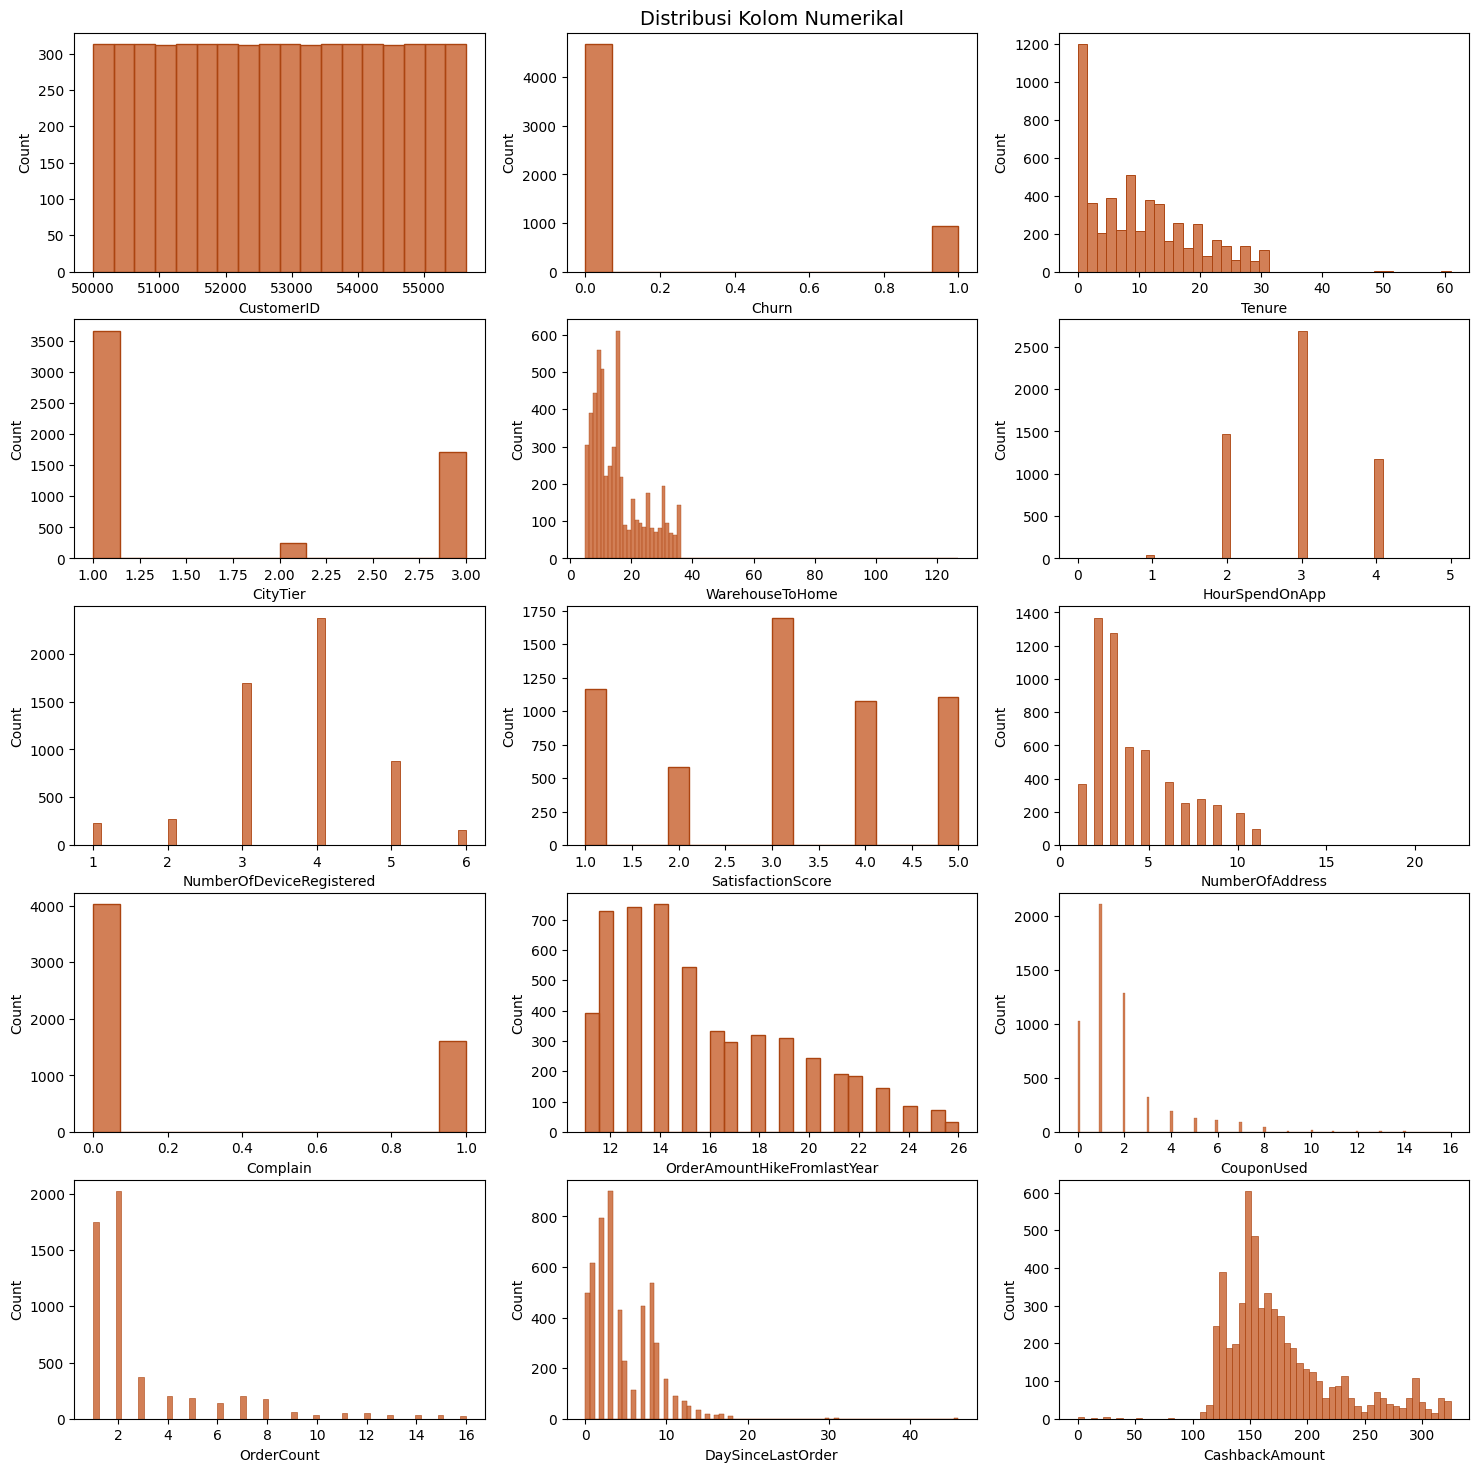

In [7]:
#Check distribusi kolom numerikal
c=1
num_cols = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(18, 18))
plt.title('Distribusi Kolom Numerikal', fontsize=14)
plt.axis('off')
for i in num_cols:
  stats, pval=normaltest(df[i])
  if pval<=0.05:
    print(f'kolom {i} tidak terdistribusi normal')
  else:
    print(f'kolom {i} terdistribusi normal')
  plt.subplot(5,3,c)
  sns.histplot(data=df,x=df[i], color='#c4541e', edgecolor="#ab4410")
  c=c+1
plt.show()



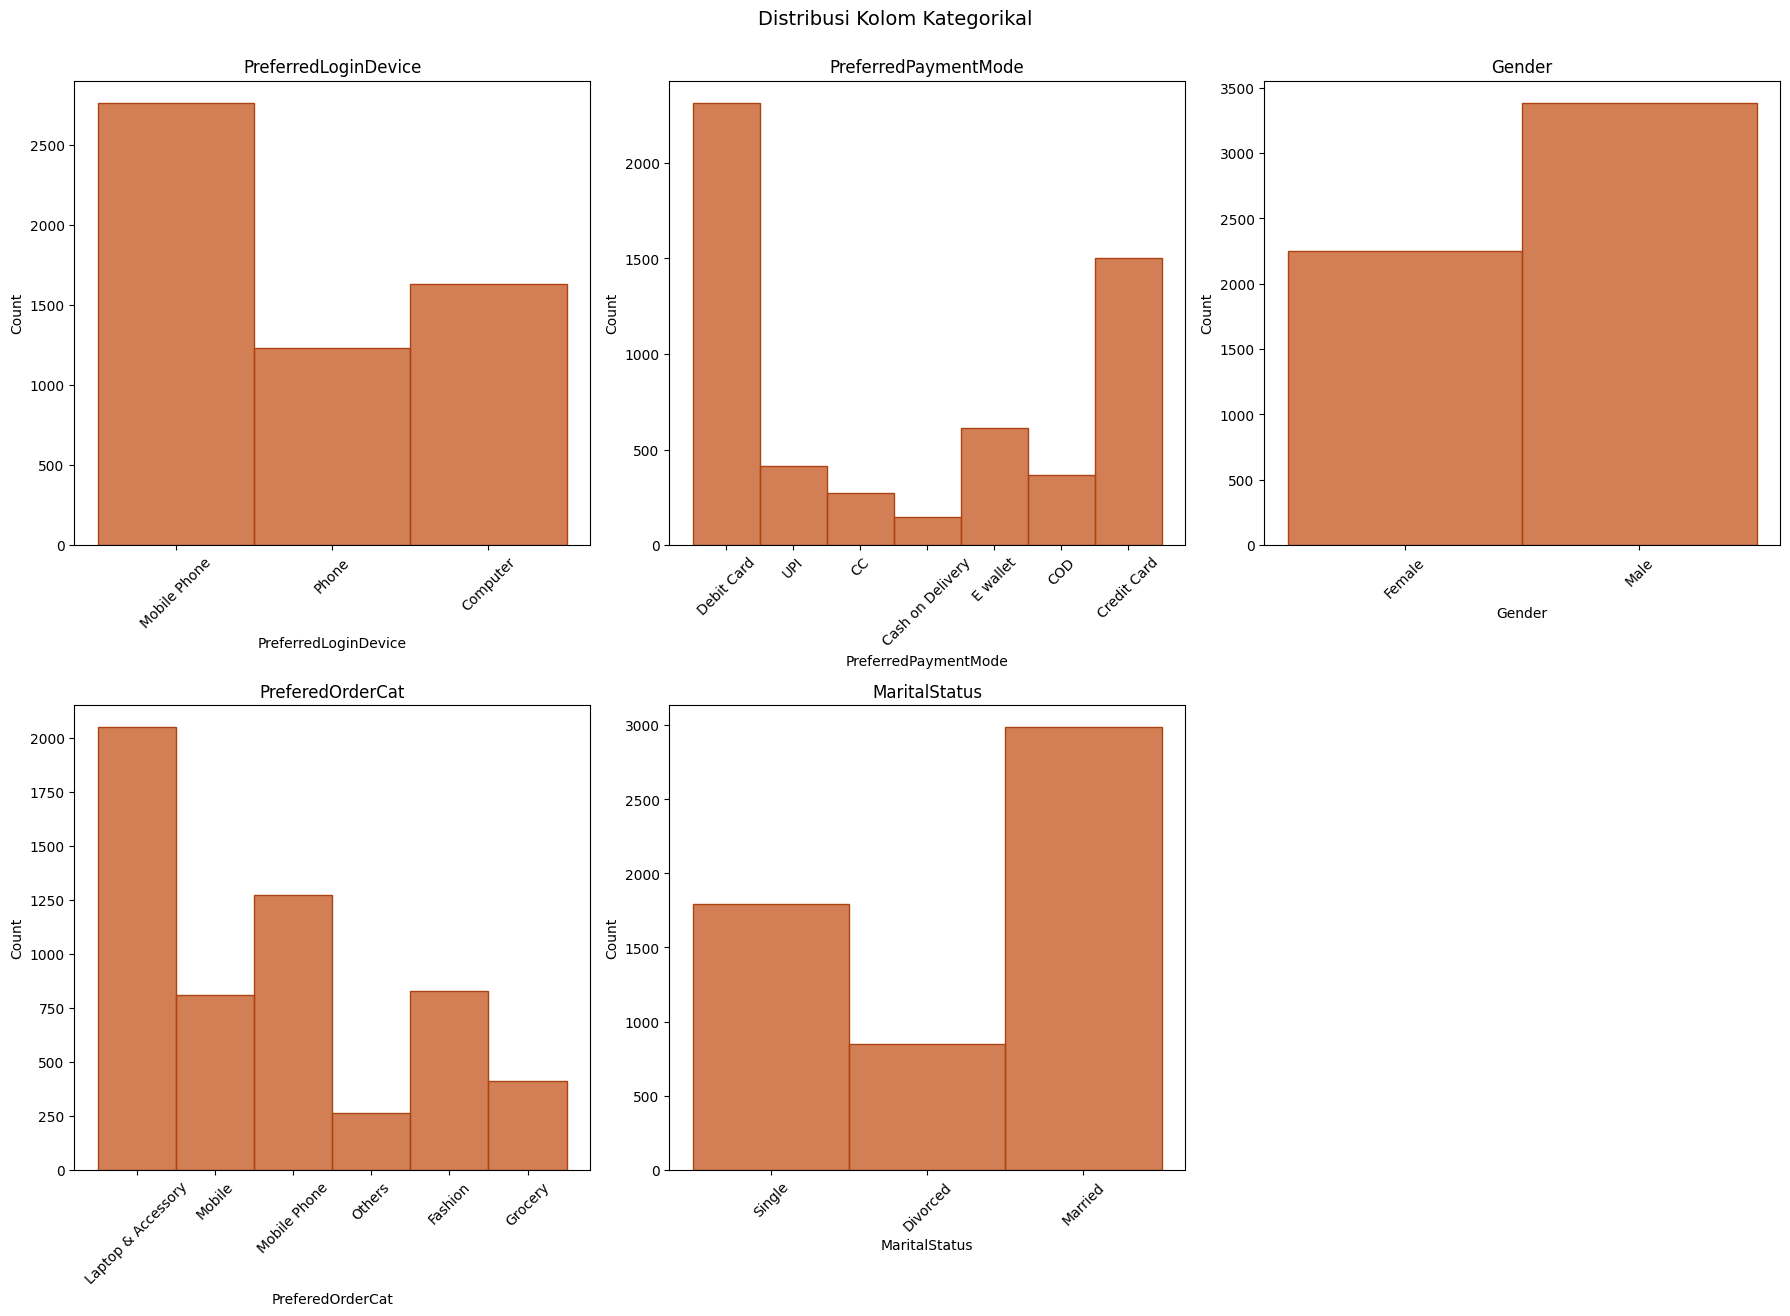

In [8]:
#Check distribusi kolom kategorikal
c = 1
cat_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(18, 18))
plt.suptitle('Distribusi Kolom Kategorikal', fontsize=14, y=1)
for col in cat_cols:
    plt.subplot(3,3,c)
    sns.histplot(data=df, x=col, color='#c4541e', edgecolor="#ab4410")
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    c=c+1
plt.show()

### Check Korelasi

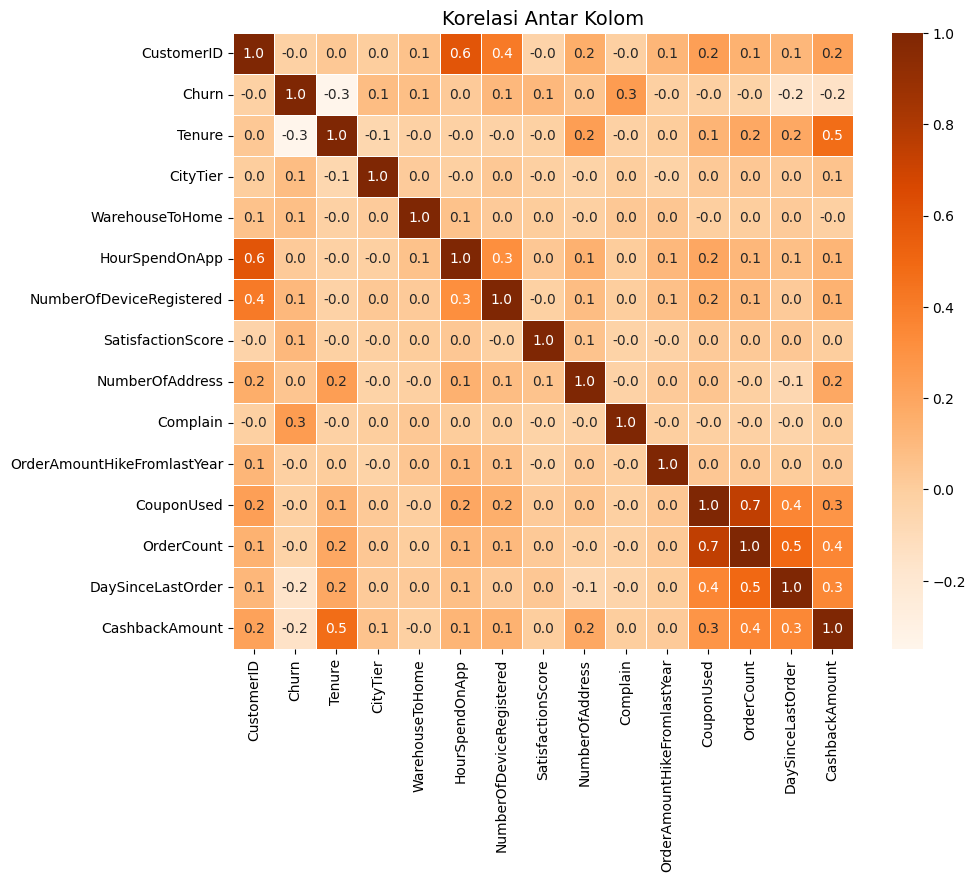

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.title('Korelasi Antar Kolom', size=14)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="Oranges", linewidths=.7)
plt.show()

### Check Missing Value

Text(0.5, 1.0, 'Missing Value Tiap Kolom')

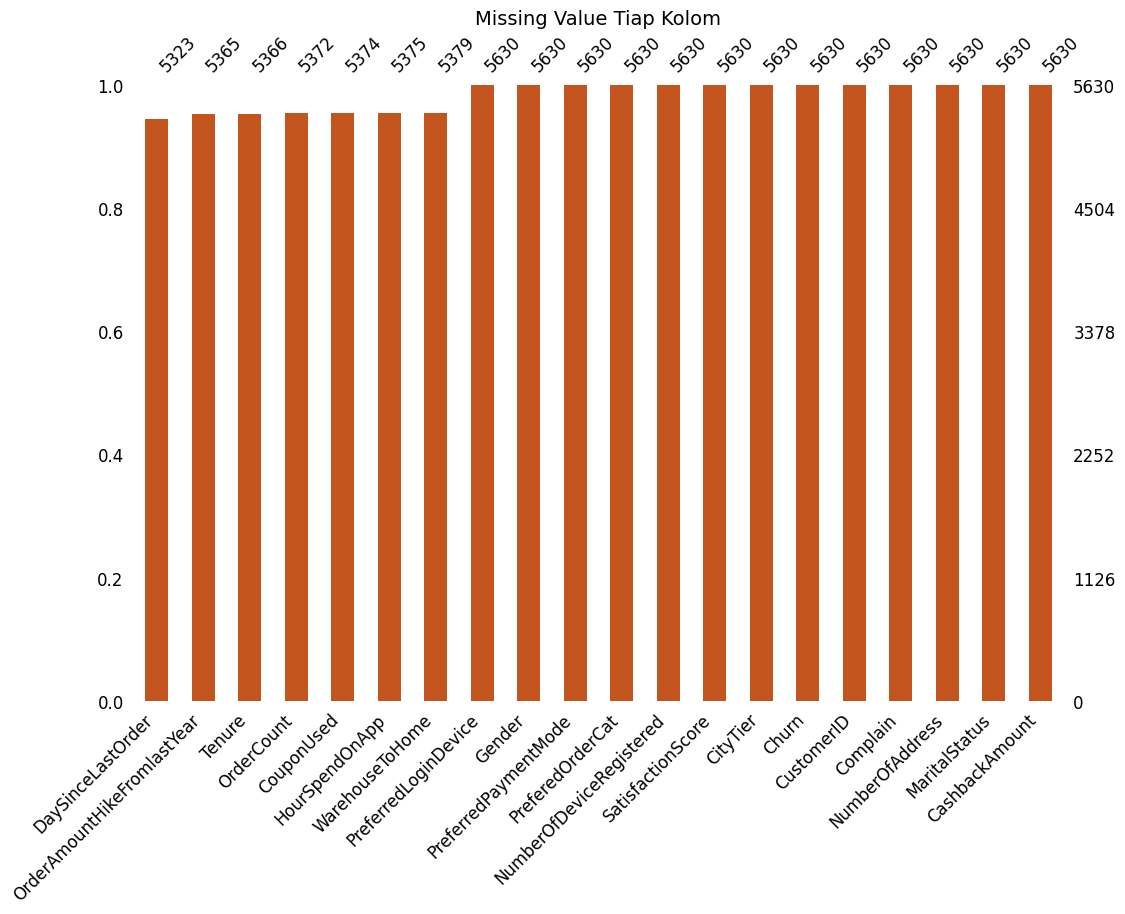

In [10]:
# Sebaran missing value di dalam data
missingno.bar(df,color='#c4541e', sort="ascending", figsize=(12,8), fontsize=12);
plt.title('Missing Value Tiap Kolom', fontsize=14)

In [11]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

<Axes: >

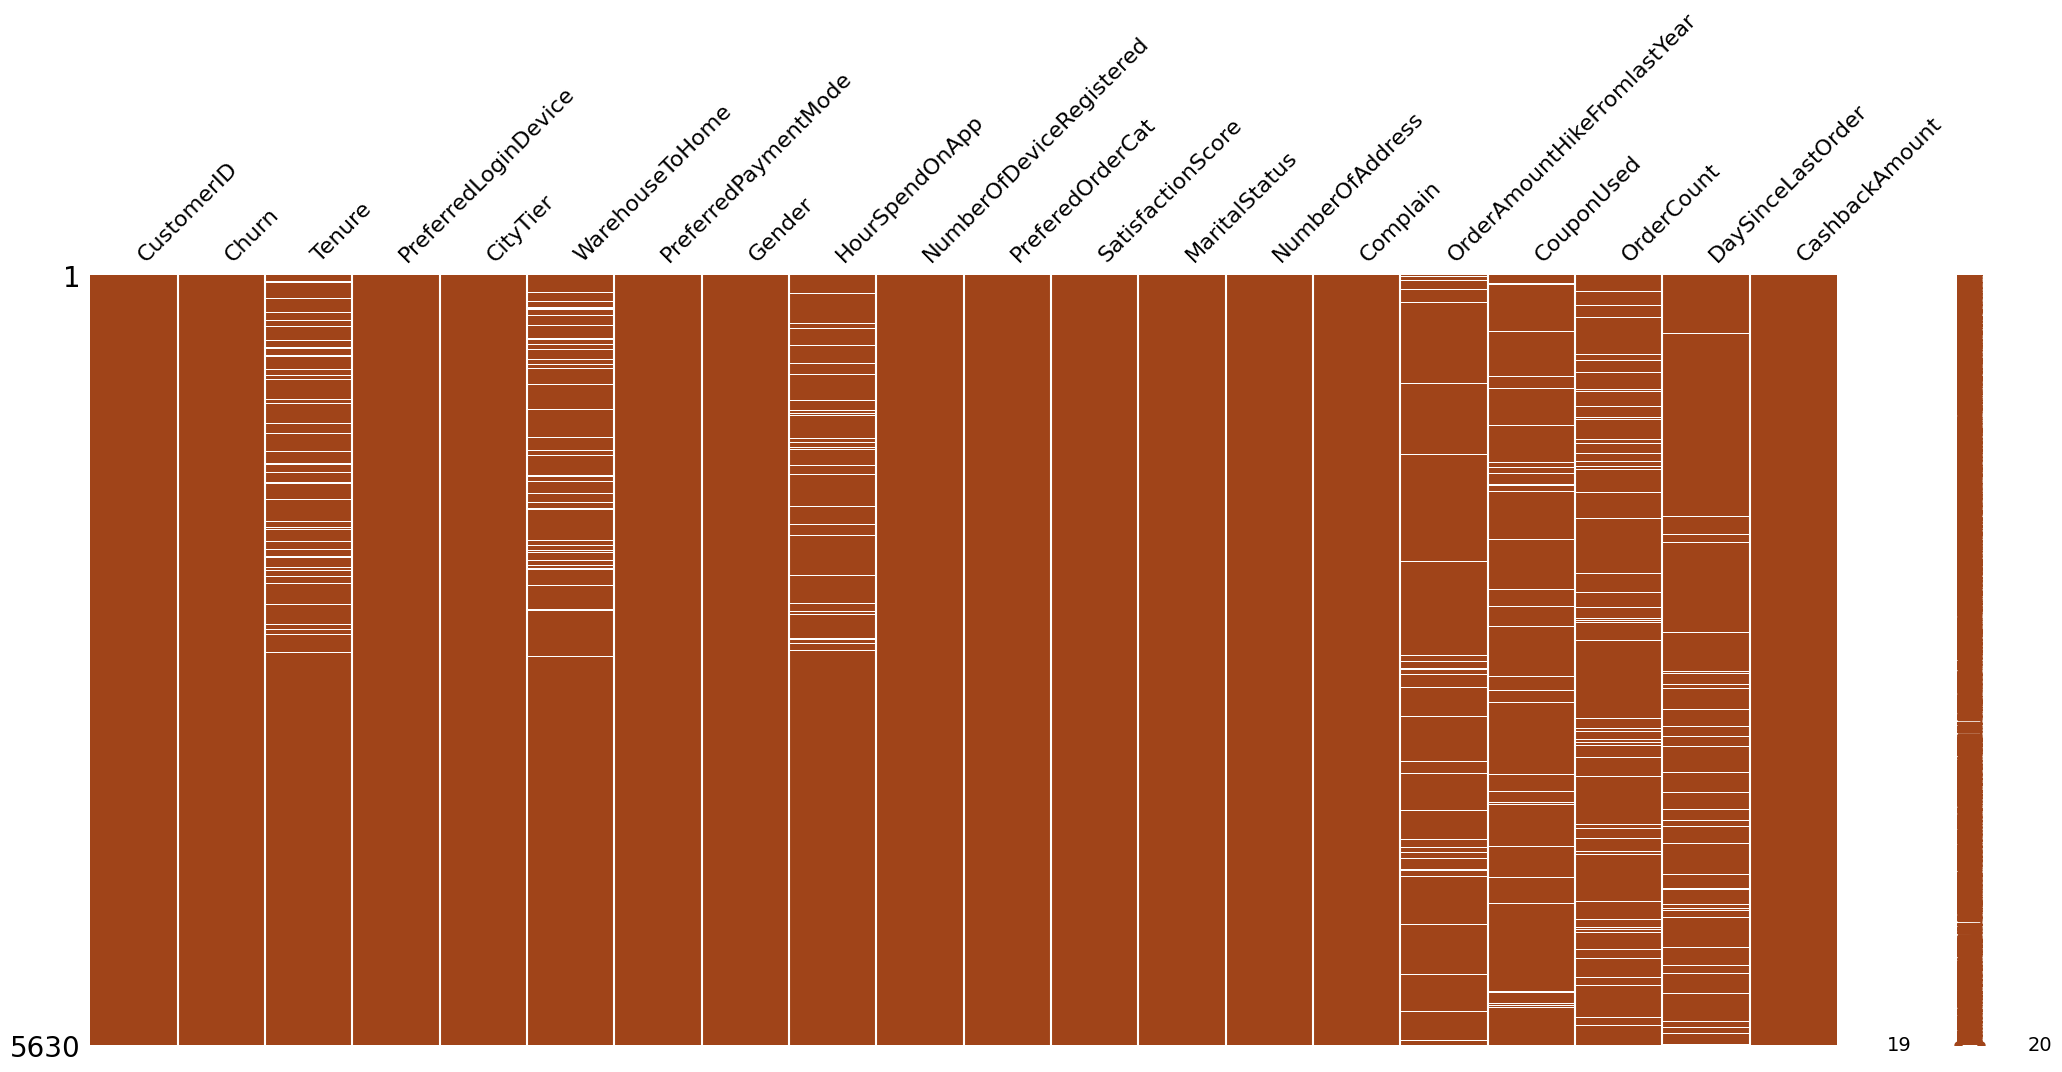

In [12]:
missingno.matrix(df, color = (0.63, 0.27, 0.1))

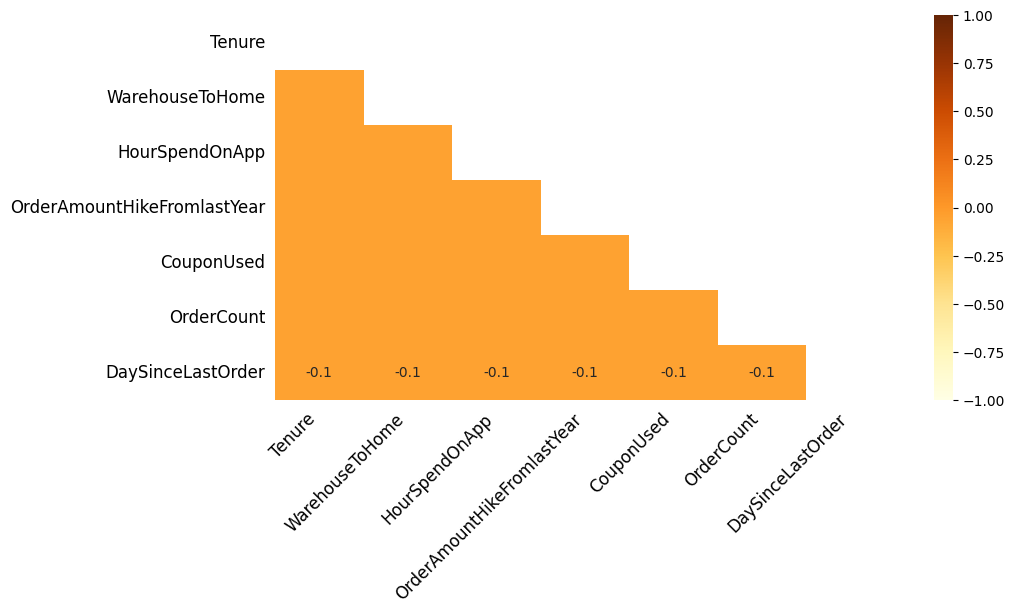

In [13]:
missingno.heatmap(df, cmap="YlOrBr", figsize=(10,5), fontsize=12);

Dapat dilihat bahwa tidak ada korelasi kuat antara kolom-kolom dengan missing value. Ketika kolom tidak berkorelasi, artinya nilai yang hilang pada satu kolom tidak bisa diprediksi secara akurat menggunakan nilai dari kolom lain. Maka, pengisian harus bergantung pada distribusi atau pola dari kolom itu sendiri.

In [14]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## **Pre-processing**

Kita membuat copy dataframe untuk membedakan data yang sudah di cleaning dan tidak.

In [15]:
df_clean=df.copy()

## General Data Cleaning

Mengubah tipe data

In [16]:
df_clean['Churn'] = df_clean['Churn'].astype(object)
df_clean['CityTier'] = df_clean['CityTier'].astype(object)
df_clean['SatisfactionScore'] = df_clean['SatisfactionScore'].astype(object)
df_clean['Complain']=df_clean['Complain'].astype(object)

Mengubah nama yang seharusnya sama

In [17]:
df_clean['PreferredLoginDevice'] = df_clean['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df_clean['PreferredPaymentMode'] = df_clean['PreferredPaymentMode'].replace('Cash on Delivery', 'COD')
df_clean['PreferredPaymentMode'] = df_clean['PreferredPaymentMode'].replace('Credit Card', 'CC')
df_clean['PreferedOrderCat'] = df_clean['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

### Handle missing Value


#### **1. Tenure**



Tenur adalah waktu (dalam bulan) pengguna menggunakan aplikasi e commers ini dari awal hingga saat ini.

Tenur berhubungan dengan citytier, citytier adalah pengelompokan kota dari kota yang metropolitan (tier 1) hingga kota kecil/ pedesaan (tier 3).

Kedua kolom tersebut berhubungan karena akses internet berpengaruh maupun exposure ecommers terhadap tier-tier kota tersebut sehingga missing value di kolom tenur dapat diisi dengan rata-rata per citytier, statement ini didapat dari [artikel ini](https://www.datanesia.id/pasar-menggiurkan-e-commerce/#:~:text=Dari%20hasil%20analisis%20data%20pada,melampaui%20kabupaten%20yang%20mengelola%20perdesaan).

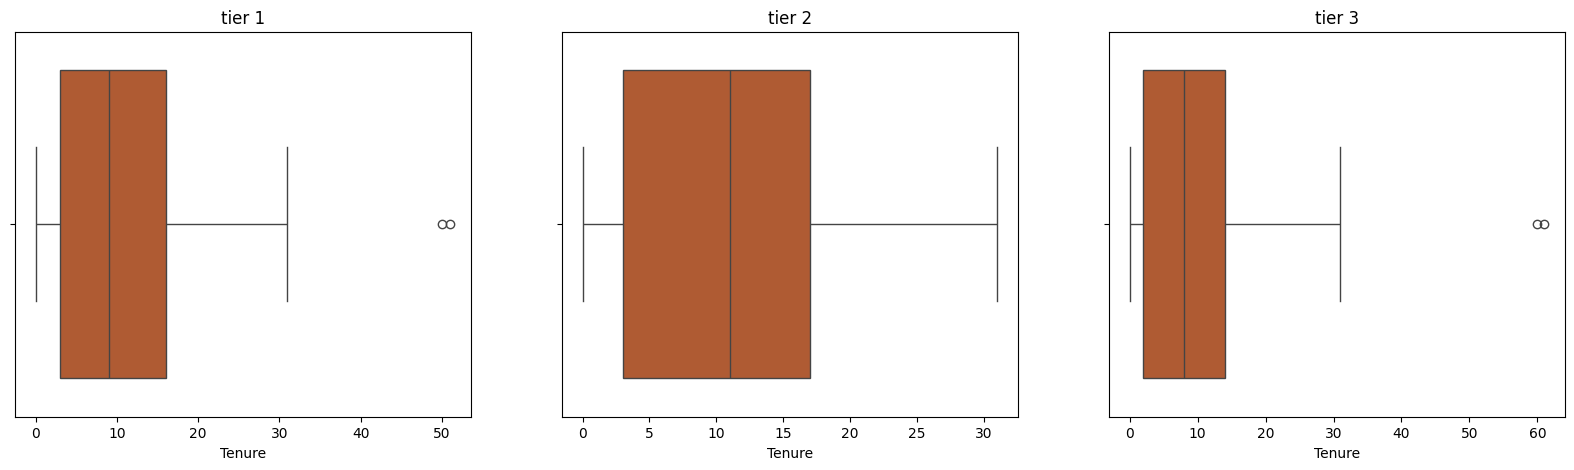

distribusi tier 1 normal
distribusi tier 2 normal
distribusi tier 3 normal


In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.title('tier 1')
sns.boxplot(data=df_clean[df_clean['CityTier']==1], x='Tenure', color='#c4541e')
plt.subplot(1,3,2)
plt.title('tier 2')
sns.boxplot(data=df_clean[df_clean['CityTier']==2], x='Tenure', color='#c4541e')
plt.subplot(1,3,3)
plt.title('tier 3')
sns.boxplot(data=df_clean[df_clean['CityTier']==3], x='Tenure', color='#c4541e')
plt.show()
for i in range(1,4):
    stats, pval=normaltest(df_clean['Tenure'][df_clean['CityTier']==i])
    if pval<=0.05:
        print(f'distribusi tier {i} tidak normal')
    else:
        print(f'distribusi tier {i} normal')

Melakukan uji anova (karena data lebih dari 2 dan semua tier terdistribusi normal) untuk melihat apakah rata-rata tenure tiap tier sama :

In [19]:
groups = [group['Tenure'].dropna() for name, group in df_clean.groupby('CityTier')]
f_stat, p_value = f_oneway(*groups)
if p_value < 0.05:
  print(" Rata-rata tiap tier berbeda")
else :
  print("Rata-rata tiap tier sama")

 Rata-rata tiap tier berbeda


Hasil test memperlihatkan bahwa benar setiap city tier mempunyai rata-rata tenure yang berbeda oleh karena itu missing value akan diisi dengan mean di setiap citytier-nya.

In [20]:
df_clean['Tenure'] = df_clean.groupby('CityTier')['Tenure'].transform(lambda x: x.fillna(x.mean()))

#### **2. WarehouseToHome**

warehousetohome juga berpengaruh terhadap citytier karena infrastruktur di tier 1 lebih baik dibandingkan tier 2 dan 3, sehingga jarak warehouse di tier 1 lebih dekat dibandingkan yang lainnya.

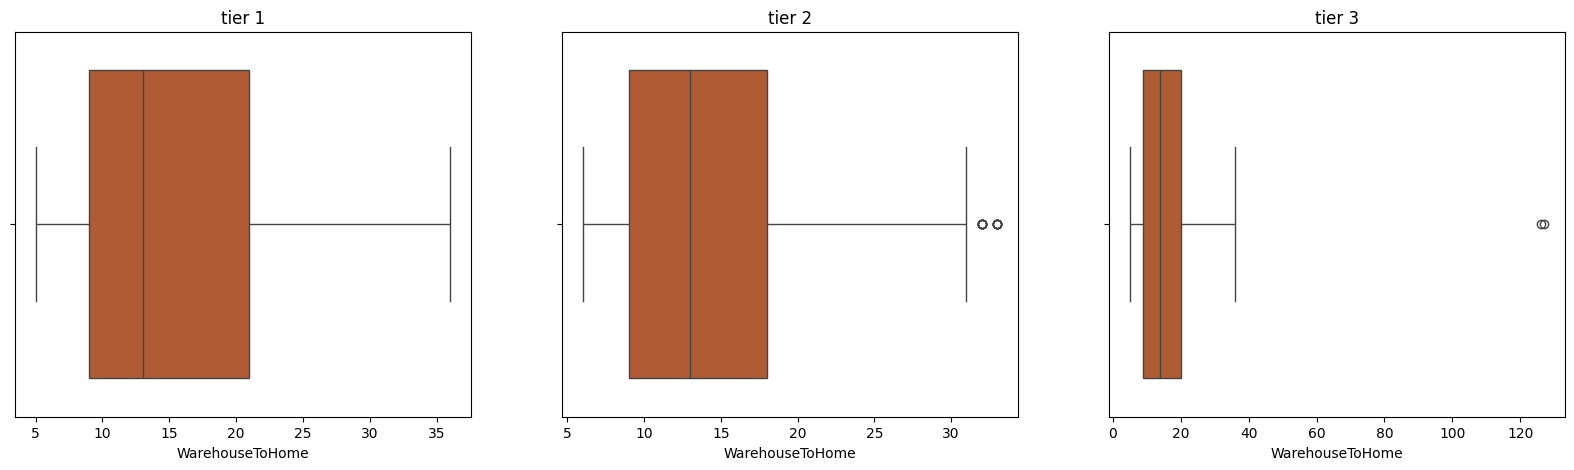

distribusi tier 1 normal
distribusi tier 2 normal
distribusi tier 3 normal


In [21]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.title('tier 1')
sns.boxplot(data=df_clean[df_clean['CityTier']==1], x='WarehouseToHome', color='#c4541e')
plt.subplot(1,3,2)
plt.title('tier 2')
sns.boxplot(data=df_clean[df_clean['CityTier']==2], x='WarehouseToHome', color='#c4541e')
plt.subplot(1,3,3)
plt.title('tier 3')
sns.boxplot(data=df_clean[df_clean['CityTier']==3], x='WarehouseToHome', color='#c4541e')
plt.show()
for i in range(1,4):
    stats, pval=normaltest(df_clean['WarehouseToHome'][df_clean['CityTier']==i])
    if pval<=0.05:
        print(f'distribusi tier {i} tidak normal')
    else:
        print(f'distribusi tier {i} normal')

Melakukan uji Anova untuk membuktikan bahwa rata-rata jarak warehouse ke rumah tiap city tier berbeda :

In [22]:
groups = [group['WarehouseToHome'].dropna() for name, group in df_clean.groupby('CityTier')]
f_stat, p_value = f_oneway(*groups)
if p_value < 0.05:
  print(" Rata-rata tiap tier berbeda")
else :
  print("Rata-rata tiap tier sama")

Rata-rata tiap tier sama


Dari hasil test rata-rata ternyata setiap city tier memiliki rata-rata warehouse ke rumah yang sama, maka tidak terbukti bahwa tiap city tier memiliki rata-rata yang berbeda. Oleh karena itu missing value akan diisi dengan rata-rata Warehouse to home sendiri.

In [23]:
df_clean['WarehouseToHome'].fillna(df_clean['WarehouseToHome'].mean(), inplace=True)

#### **3. HourSpendOnApp**

HourSpendOnApp berpengaruh terhadap PreferredLoginDevice karena pengunaan mobile phone berbeda dengan komputer.

distribusi tier Mobile Phone normal
distribusi tier Computer normal


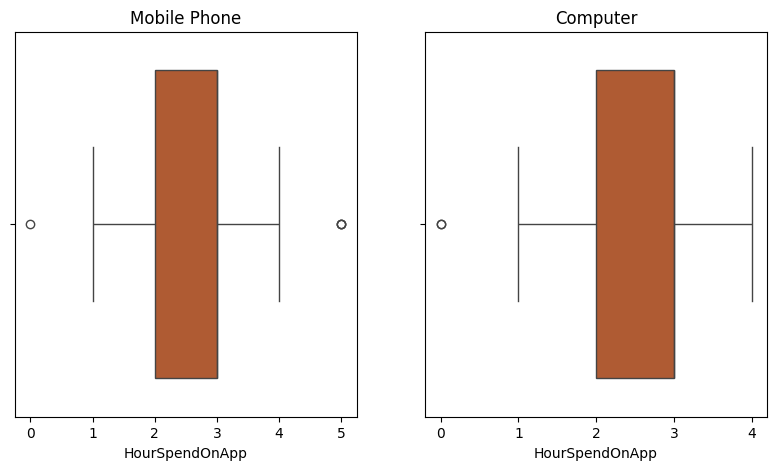

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('Mobile Phone')
sns.boxplot(data=df_clean[df_clean['PreferredLoginDevice']=='Mobile Phone'], x='HourSpendOnApp', color='#c4541e')
plt.subplot(1,3,2)
plt.title('Computer')
sns.boxplot(data=df_clean[df_clean['PreferredLoginDevice']== 'Computer'], x='HourSpendOnApp', color='#c4541e')
for i in ['Mobile Phone', 'Computer']:
    stats, pval=normaltest(df_clean['HourSpendOnApp'][df_clean['PreferredLoginDevice']==i])
    if pval<=0.05:
        print(f'distribusi tier {i} tidak normal')
    else:
        print(f'distribusi tier {i} normal')

Data akan diuji rata-ratanya menggunakan t-test karena kedua kategori terdistribusi normal.

In [25]:
groups = [group['HourSpendOnApp'].dropna() for name, group in df_clean.groupby('PreferredLoginDevice')]
u_stat, p_value = ttest_ind(*groups)
if p_value < 0.05:
    print("Ada perbedaan signifikan antara kedua kelompok")
else:
    print("Tidak ada perbedaan signifikan antara kedua kelompok")


Tidak ada perbedaan signifikan antara kedua kelompok


karena rata-rata terbukti tidak berbeda maka missing value dengan mean HourSpendOnApp.

In [26]:
df_clean['HourSpendOnApp'].fillna(df_clean['HourSpendOnApp'].mean(), inplace=True)

#### **4. OrderCount**

untuk mengisi order count dengan cara melihat CouponUsed-nya, karena jika kupon terpakai 1 kali berarti pasti sudah ada minimal 1 order.

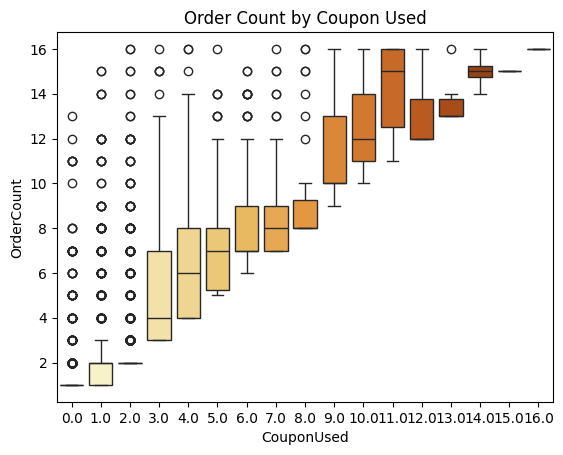

distribusi coupon used 0 normal
distribusi coupon used 1 normal
distribusi coupon used 2 normal
distribusi coupon used 3 normal
distribusi coupon used 4 normal
distribusi coupon used 5 normal
distribusi coupon used 6 normal
distribusi coupon used 7 normal
distribusi coupon used 8 normal
distribusi coupon used 9 normal
distribusi coupon used 10 normal
distribusi coupon used 11 normal
distribusi coupon used 12 normal
distribusi coupon used 13 normal
distribusi coupon used 14 normal
distribusi coupon used 15 normal
distribusi coupon used 16 normal


In [27]:
sns.boxplot(data=df_clean, x='CouponUsed', y='OrderCount', palette="YlOrBr")
plt.title('Order Count by Coupon Used')
plt.show()
for i in range(0,17):
    stats, pval=normaltest(df_clean['OrderCount'][df_clean['CouponUsed']==i])
    if pval<=0.05:
        print(f'distribusi coupon used {i} tidak normal')
    else:
        print(f'distribusi coupon used {i} normal')

Dari gambar terlihat semakin banyak coupon used, rata-rata ordercountnya juga semakin banyak sehingga missing value akan diisi dengan setiap mean ordercount ( karena terdistribusi normal) pada setiap jumlah coupon used-nya.

In [28]:
group=df_clean.groupby('CouponUsed')['OrderCount'].mean().round()

In [29]:
df_clean['OrderCount'] = df_clean['OrderCount'].fillna(df['CouponUsed'].map(group))

#### **5. CouponUsed**

untuk mengisi couponused dengan cara melihat ordercount-nya, karena jika order nya 0 couponused pasti 0 dan sama seperti mengisi ordercount jika ada 1 order kemungkinan memakai 1 coupon.

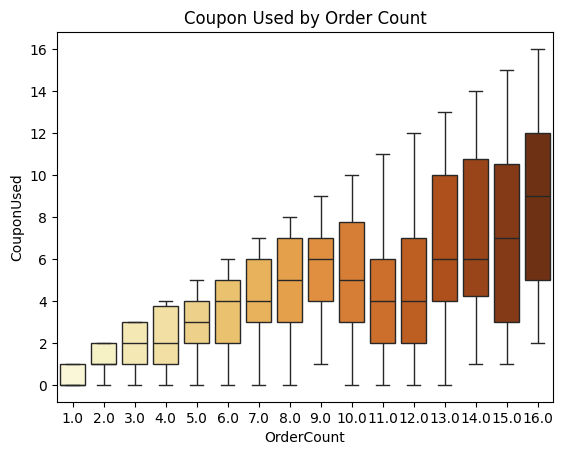

distribusi ordercount 0 normal
distribusi ordercount 1 normal
distribusi ordercount 2 normal
distribusi ordercount 3 normal
distribusi ordercount 4 normal
distribusi ordercount 5 normal
distribusi ordercount 6 normal
distribusi ordercount 7 normal
distribusi ordercount 8 normal
distribusi ordercount 9 normal
distribusi ordercount 10 normal
distribusi ordercount 11 normal
distribusi ordercount 12 normal
distribusi ordercount 13 normal
distribusi ordercount 14 normal
distribusi ordercount 15 normal
distribusi ordercount 16 normal


In [30]:
sns.boxplot(data=df_clean, x='OrderCount', y='CouponUsed', palette="YlOrBr")
plt.title('Coupon Used by Order Count')
plt.show()
for i in range(0,17):
    stats, pval=normaltest(df_clean['CouponUsed'][df_clean['OrderCount']==i])
    if pval<=0.05:
        print(f'distribusi ordercount {i} tidak normal')
    else:
        print(f'distribusi ordercount {i} normal')

Dari gambar terlihat semakin banyak OrderCount, rata-rata CouponUsed juga semakin banyak sehingga missing value akan diisi dengan setiap mean couponused pada setiap jumlah ordercount-nya.

In [31]:
df_clean['CouponUsed'] = df_clean.groupby('OrderCount')['CouponUsed'].transform(lambda x: x.fillna(x.mean().round()))

#### **6. OrderAmountHikeFromlastYear**

orderamounthikefromlastyear adalah presentasi jumlah kenaikan berdasarkan ordercount tahun sebelumnya, sehingga kolom ini berhubungan dengan ordercount karena jika presentase naik jumlah ordercount-nya juga akan naik.

oleh karena itu missing value akan diisi berdasarkan mean dari tiap jumlah ordercount-nya.

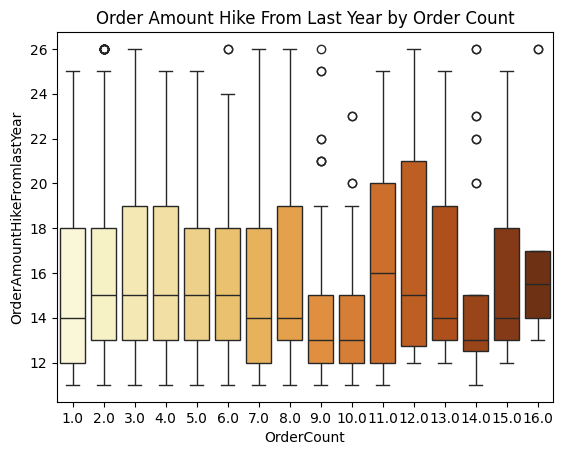

distribusi ordercount 0 normal
distribusi ordercount 1 normal
distribusi ordercount 2 normal
distribusi ordercount 3 normal
distribusi ordercount 4 normal
distribusi ordercount 5 normal
distribusi ordercount 6 normal
distribusi ordercount 7 normal
distribusi ordercount 8 normal
distribusi ordercount 9 normal
distribusi ordercount 10 normal
distribusi ordercount 11 normal
distribusi ordercount 12 normal
distribusi ordercount 13 normal
distribusi ordercount 14 normal
distribusi ordercount 15 normal
distribusi ordercount 16 normal


In [32]:
sns.boxplot(data=df_clean, x='OrderCount', y='OrderAmountHikeFromlastYear', palette="YlOrBr")
plt.title('Order Amount Hike From Last Year by Order Count')
plt.show()
for i in range(0,17):
    stats, pval=normaltest(df_clean['OrderAmountHikeFromlastYear'][df_clean['OrderCount']==i])
    if pval<=0.05:
        print(f'distribusi ordercount {i} tidak normal')
    else:
        print(f'distribusi ordercount {i} normal')

Dari gambar terlihat seluruh rata-rata OrderAmountHikeFromlastYear terlihat sama di setiap ordercount, makan akan dilakukan uji menggunakan anova.

In [33]:
groups = [group['OrderAmountHikeFromlastYear'].dropna() for name, group in df_clean.groupby('OrderCount')]
f_stat, p_value = f_oneway(*groups)
if p_value < 0.05:
  print(" Rata-rata tiap OrderCount berbeda")
else :
  print("Rata-rata tiap OrderCount sama")

 Rata-rata tiap OrderCount berbeda


Karena ada perbedaan rata-rata di Ordercountnya maka missing value akan diisi rata-rata OrderAmountHikeFromlastYear di setiap ordercount.

In [34]:
df_clean['OrderAmountHikeFromlastYear'] = df_clean.groupby('OrderCount')['OrderAmountHikeFromlastYear'].transform(lambda x: x.fillna(x.mean().round()))

#### **7. DaySinceLastOrder**

Daysincelastorder berhubungan dengan ordercount karena jumlah order count yang banyak berarti jarak hari pembelian terakhirnya lebih pendek dibandingkan yang ordercountnya sedikit.

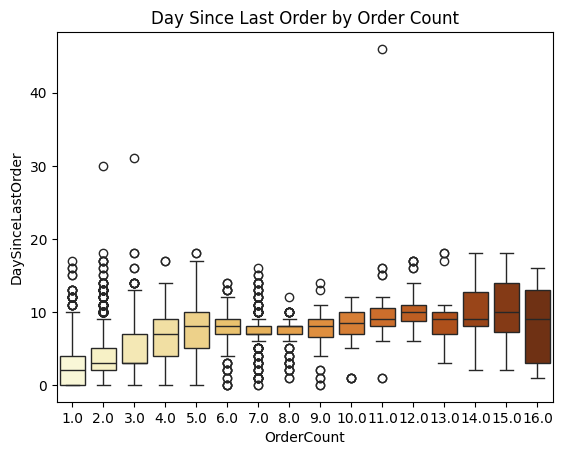

distribusi ordercount 0 normal
distribusi ordercount 1 normal
distribusi ordercount 2 normal
distribusi ordercount 3 normal
distribusi ordercount 4 normal
distribusi ordercount 5 normal
distribusi ordercount 6 normal
distribusi ordercount 7 normal
distribusi ordercount 8 normal
distribusi ordercount 9 normal
distribusi ordercount 10 normal
distribusi ordercount 11 normal
distribusi ordercount 12 normal
distribusi ordercount 13 normal
distribusi ordercount 14 normal
distribusi ordercount 15 normal
distribusi ordercount 16 normal


In [35]:
sns.boxplot(data=df_clean, x='OrderCount', y='DaySinceLastOrder', palette="YlOrBr")
plt.title('Day Since Last Order by Order Count')
plt.show()
for i in range(0,17):
    stats, pval=normaltest(df_clean['DaySinceLastOrder'][df_clean['OrderCount']==i])
    if pval<=0.05:
        print(f'distribusi ordercount {i} tidak normal')
    else:
        print(f'distribusi ordercount {i} normal')

Sekarang rata- rata akan diuji menggunakan anova untuk membuktikan bahwa ada perbedaan rata-rata di setiap ordercountnya.

In [36]:
groups = [group['DaySinceLastOrder'].dropna() for name, group in df_clean.groupby('OrderCount')]
f_stat, p_value = f_oneway(*groups)
if p_value < 0.05:
  print(" Rata-rata tiap OrderCount berbeda")
else :
  print("Rata-rata tiap OrderCount sama")

 Rata-rata tiap OrderCount berbeda


Karena ada perbedaan rata-rata di Ordercountnya maka missing value akan diisi rata-rata DaySinceLastOrder di setiap ordercount.

In [37]:
df_clean['DaySinceLastOrder'] = df_clean.groupby('OrderCount')['DaySinceLastOrder'].transform(lambda x: x.fillna(x.mean().round()))

### *Cleaned Data*

In [38]:
listItem = []
for col in df_clean.columns :
    listItem.append([col, df_clean[col].dtype, df_clean[col].isna().sum(), round((df_clean[col].isna().sum()/len(df_clean[col])) * 100,2),
                    df_clean[col].nunique(), list(df_clean[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CustomerID,int64,0,0.0,5630,"[52572, 50950]"
1,Churn,object,0,0.0,2,"[1, 0]"
2,Tenure,float64,0,0.0,39,"[30.0, 31.0]"
3,PreferredLoginDevice,object,0,0.0,2,"[Computer, Mobile Phone]"
4,CityTier,object,0,0.0,3,"[1, 2]"
5,WarehouseToHome,float64,0,0.0,35,"[32.0, 19.0]"
6,PreferredPaymentMode,object,0,0.0,5,"[Debit Card, E wallet]"
7,Gender,object,0,0.0,2,"[Male, Female]"
8,HourSpendOnApp,float64,0,0.0,7,"[2.9315348837209303, 1.0]"
9,NumberOfDeviceRegistered,int64,0,0.0,6,"[1, 4]"


Semua tipe data, value yang unique, dan missing value sudah dibersihkan semua.

## **Data Analysis**

### General Churn

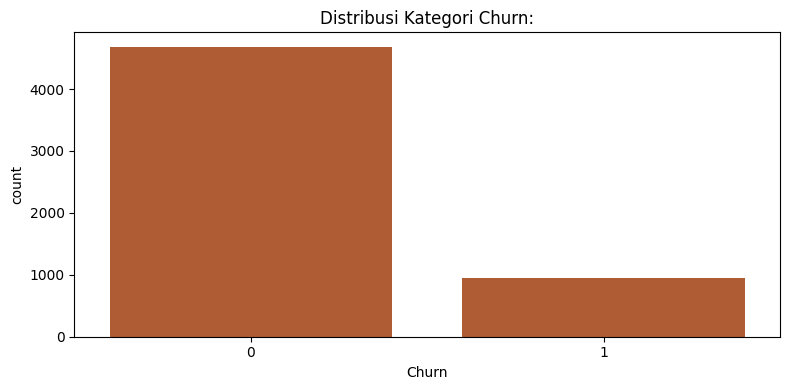

Jumlah kategori unik: 2
Persentase kategori unik (%):
Churn
0    83.16
1    16.84
Name: proportion, dtype: float64


In [39]:
churn = df_clean['Churn']

# Visualisasi distribusi
plt.figure(figsize=(8, 4))
ch=sns.countplot(data=df_clean, x='Churn', order=churn.value_counts().index, color='#c4541e')
plt.title(f'Distribusi Kategori Churn:')
plt.tight_layout()
plt.show()

# Deskripsi distribusi
print("Jumlah kategori unik:", churn.nunique())
print("Persentase kategori unik (%):")
distribusi = (churn.value_counts(normalize=True) * 100).round(2)
print(distribusi)

Pertama-tama mari lihat distribusi churn.
<br>
Disini dapat dilihat bahwa dari semua data pengguna, 83,16% tidak melakukan churn dan 16,84% lainnya melakukan churn. Dalam bisnis, tentu saja perusahaan ingin persentase ini sekecil mungkin, menurut [artikel](https://www.sobot.io/article/average-churn-rate-for-ecommerce-stores-trends-2024-2025/). Standar benchmark: churn tahunan di bawah 10% dianggap sehat, dan jika nilai di atas itu mulai mengkhawatirkan.

E-commerce memiliki 2 tipe churn: Voluntary & involuntary
* Voluntary churn: Terjadi ketika pelanggan dengan sengaja mengakhiri hubungan dengan perusahaan atau layanan. Penyebabnya seperti :
  - Pindah ke penyedia layanan lain
  - Tidak puas dengan layanan atau produk
  - Perubahan kebutuhan atau preferensi
* Involuntary churn: Terjadi karena faktor eksternal di luar kendali pelanggan atau perusahaan. Penyebabnya seperti :
  - Perubahan lokasi tempat tinggal
  - Masalah teknis atau pemadaman layanan
  - Perubahan kebijakan atau regulasi
  
Karena disini stakeholders adalah sales & marketing, maka kita akan berfokus kepada voluntary churn. Voluntary churn dirasa lebih bisa dikontrol karena perilaku pelanggan bisa dianalisis dari data yang ada, dan bisa diakali dengan strategi marketing.


### Numerical Col vs. Churn

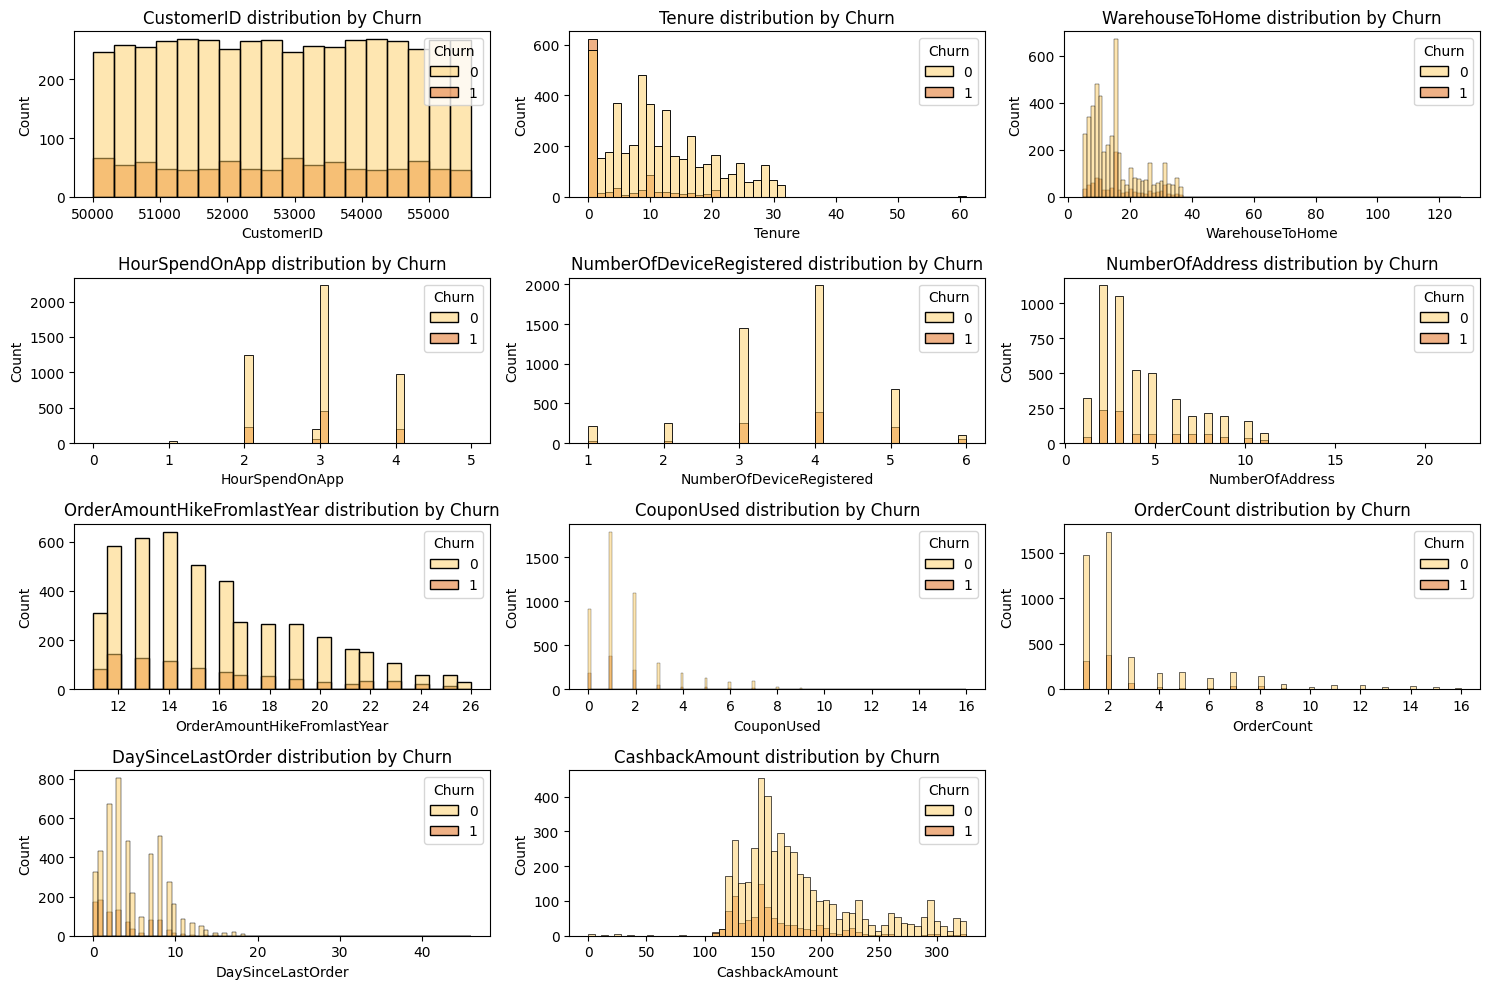

In [40]:
# Perbandingan churn di kolom numerikal
c=1
plt.figure(figsize=(15, 10))
for i in df_clean.columns:
  if df_clean[i].dtypes != "object" :
    plt.subplot(4,3,c)
    sns.histplot(data=df_clean, x=df_clean[i], hue=df_clean['Churn'], palette="YlOrBr")
    plt.title(f'{i} distribution by Churn')
    plt.tight_layout()
    c=c+1
plt.show()

setiap kolom akan diuji apakah ada hubungan dengan kolom Churn. Uji menggunakan mann-whitney untuk kolom yang tidak terdistribusi normal dan t-test untuk kolom yang normal.

jika rata-rata berbeda tiap churn 0/1 maka ada hubungan di kolom tersebut dengan churn.

In [41]:
for i in df_clean.columns:
  if df_clean[i].dtypes != "object" :
    churned = df_clean[df_clean['Churn'] == 1][i].dropna()
    not_churned = df_clean[df_clean['Churn'] == 0][i].dropna()
    stats, pval=normaltest(df_clean[i])
    if pval<=0.05:
      stat, p_value = mannwhitneyu(churned, not_churned)
      if p_value < 0.05:
        print(f'kolom {i} berhubungan dengan pelanggan yang akan churn')
      else:
        print(f'kolom {i} tidak berhubungan dengan pelanggan yang akan churn')
    else:
      t_stat, p_value = ttest_ind(churned, not_churned)
      if p_value < 0.05:
          print(f'kolom {i} berhubungan dengan pelanggan yang akan churn')
      else:
          print(f'kolom {i} tidak berhubungan dengan pelanggan yang akan churn')

kolom CustomerID tidak berhubungan dengan pelanggan yang akan churn
kolom Tenure berhubungan dengan pelanggan yang akan churn
kolom WarehouseToHome berhubungan dengan pelanggan yang akan churn
kolom HourSpendOnApp tidak berhubungan dengan pelanggan yang akan churn
kolom NumberOfDeviceRegistered berhubungan dengan pelanggan yang akan churn
kolom NumberOfAddress berhubungan dengan pelanggan yang akan churn
kolom OrderAmountHikeFromlastYear tidak berhubungan dengan pelanggan yang akan churn
kolom CouponUsed tidak berhubungan dengan pelanggan yang akan churn
kolom OrderCount berhubungan dengan pelanggan yang akan churn
kolom DaySinceLastOrder berhubungan dengan pelanggan yang akan churn
kolom CashbackAmount berhubungan dengan pelanggan yang akan churn


Insight kolom numerik vs. churn:
* Tenure: Pelanggan yang churn memiliki tenure dibawah 21 bulan. Untuk menanggulangi hal tersebut, kita sarankan team marketing untuk memberikan promo kepada pelanggan yang tenurenya yang dibawah 21 bulan melalui voucher.

* WareHouseToHome: Distribusi mayoritas pelanggan tinggal pada jarak < 15 km dari warehouse. Pelanggan yang churn justru lebih banyak berasal dari kelompok dengan jarak ≤ 5 km. Hal ini menunjukkan bahwa kedekatan lokasi dengan gudang tidak selalu berpengaruh positif terhadap loyalitas. Pelanggan dengan jarak dekat, yang seharusnya lebih menguntungkan dari sisi operasional dan kecepatan pengiriman, justru memiliki risiko churn lebih tinggi. Disarankan team marketing melakukan strategi promo khusus gratis ongkir tanpa minimum belanja khusus pelanggan radius ≤ 5 km.

* HourSpendOnApp: Pengguna yang menghabiskan waktu lebih sedikit di aplikasi, cenderung churn. Semakin lama waktu yang dihabiskan di app, semakin pengguna tidak churn. Disarankan team marketing membuat campaign seperti rekomendasi produk berdasarkan searh history pribadi, flash sale dengan tenggat waktu, atau push notification & email personalisasi untuk mendorong interaksi aplikasi.

* NumberOfdeviceRegistered: Persentase churn rate tertinggi ada pada pelanggan dengan 6 perangkat di 34.57%. Berdasarkan distribusi, semakin banyak pelanggan mengunakan device maka churn rate semakin meningkat/ pelanggan makin berpotensi churn. Saran untuk team marketing bisa memasang strategi retensi dengan segmentasi risiko tinggi.  

* NumberOfAddress: Jumlah alamat tidak berpengaruh terhadap pelanggan yang akan churn. Oleh karena itu, team marketing tidak perlu memberikan insentif ke penlanggan berdasarkan number of adressnya.

* Complain: Pelanggan yang complain 33% akan churn dibandingkan yang tidak complain sebanyak 11%. Team marketing sebaiknya memberikan insentif / promo ke pelanggan yang memiliki complain.

* OrderAmountHikeFromLastYear: Presentasi kenaikan jumlah order tahun lalu tidak berpengaruh terhadap pelanggan yang akan churn. Sebaiknya team marketing tidak memberikan promo/insentif kepada pelanggan berdasarkan presentase order tahun lalu.

* CouponUsed: Penggunaan kupon tidak berpengaruh terhadap pelanggan yang akan churn, sehingga team marketing tidak perlu memberikan promo ke pelanggan berdasarkan penggunaan kupon.

* OrderCount: Pelanggan yang churn mayoritas memiliki jumlah order count kurang dari 3. Untuk menangani hal tersebut bisa dengan memberikan saran kepada team marketing untuk memberikan promo ke pelanggan dengan order count dibawah 3 untuk memotivasi pelanggan agar belanja lagi di aplikasi.

* DaySinceLastOrder: Pelanggan yang cenderung churn mayoritas daysincelastorder ada dibawah 4 hari, oleh karena itu kita bisa memberikan saran ke team marketing untuk memberikan promo kepada pelanggan yang tidak melakukan transaksi selama kurang dari 4 hari sejak terakhir kali melakukan transaksi.

* CashbackAmount: Pelanggan yang churn menerima rata-rata Cashback sebesar 160.37. Berdasarkan itu, kita bisa memberikan saran kepada team marketing untuk memberikan promo cashback yang lebih besar kepada pelanggan yang sebelumnya menerima cashback kurang dari 161.

### Categorical Col vs. Churn

#### **1. MaritalStatus**

In [42]:
df_pivot=df_clean.pivot_table(index='MaritalStatus', columns='Churn', values='Tenure', aggfunc=len)
df_pivot['total']=df_pivot.sum(axis=1)
df_pivot['Churnrate']=df_pivot[1]/df_pivot['total']*100
df_pivot.sort_values('Churnrate', ascending=False, inplace=True)
df_pivot

Churn,0,1,total,Churnrate
MaritalStatus,,,,
Single,1316,480,1796,26.726058
Divorced,724,124,848,14.622642
Married,2642,344,2986,11.520429


Text(0, 0.5, 'Churn rate (%)')

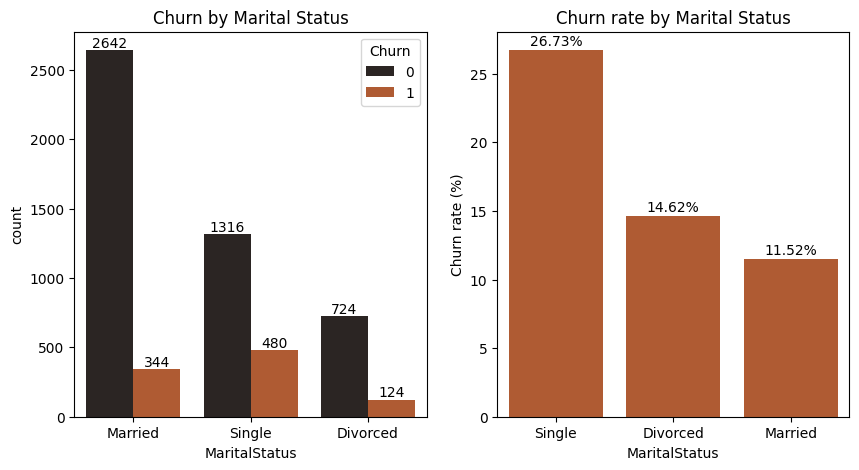

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ms=sns.countplot(data=df_clean, x='MaritalStatus', hue='Churn', color='#c4541e', order=df_clean['MaritalStatus'].value_counts().index)
for container in ms.containers:
       ms.bar_label(container)
plt.title('Churn by Marital Status')
plt.subplot(1,2,2)
a=sns.barplot(data=df_pivot , y='Churnrate', x='MaritalStatus', color='#c4541e')
plt.title('Churn rate by Marital Status')
for i, val in enumerate(df_pivot['Churnrate']):
    a.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)
plt.ylabel('Churn rate (%)')

Terlihat bahwa pelanggan yang berstatus single lebih cenderung untuk melakukan churn dengan persentase sebesar 26.72%. Saran kepada team marketing bisa menerapkan strategi seperti personalisasi iklan untuk pelanggan yang berstatus single berdasarkan histori pembeliannya dan juga memberikan voucher diskon.

#### **2. CityTier**

In [44]:
city_pivot=df_clean.pivot_table(index='CityTier', columns='Churn', values='CustomerID', aggfunc=len)
city_pivot['total']=city_pivot.sum(axis=1)
city_pivot['Churnrate']=(city_pivot[1]/city_pivot['total']*100).round(2)
city_pivot.sort_values('Churnrate', ascending=False, inplace=True)
city_pivot

Churn,0,1,total,Churnrate
CityTier,,,,
3,1354,368,1722,21.37
2,194,48,242,19.83
1,3134,532,3666,14.51


Text(0.5, 1.0, 'Churn rate by City Tier')

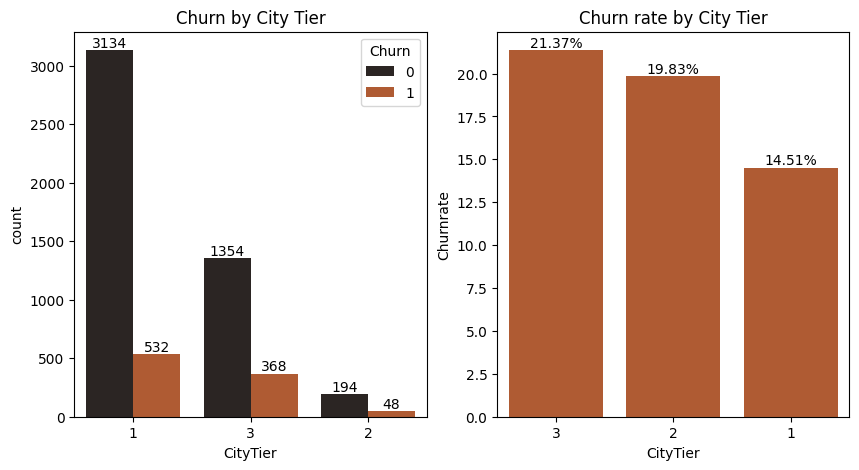

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ct=sns.countplot(data=df_clean, x='CityTier', hue='Churn', color='#c4541e', order=df_clean['CityTier'].value_counts().index)
for container in ct.containers:
       ct.bar_label(container)
plt.title('Churn by City Tier')
plt.subplot(1,2,2)
ct_bar=sns.barplot(data=city_pivot , y='Churnrate', x='CityTier', color='#c4541e', order=[3,2,1])
ct_bar.bar_label(ct_bar.containers[0], fmt='%.2f%%' ,fontsize=10)
plt.title('Churn rate by City Tier')

Pelanggan yang melakukan churn terbanyak berada pada city tier 3. Hal tersebut kemungkinan terjadi karena city tier 3 merupakan daerah yang warganya cenderung kelas menengah dan infrastuktur digitalnya yang masih berkembang ([sumber](https://www.digitalnewsasia.com/digital-economy/tier-two-and-three-indonesia-cities-grow-5x-next-5-years-alpha-jwc-ventures)), sehingga kemungkinan mempengaruhi daya beli. Oleh karena itu, kita bisa sarankan team marketing untuk memberikan promo seperti voucher diskon kepada pelanggan yang berada di city tier 3.

#### **3. PreferedPaymentMode**

In [46]:
payment_pivot=df_clean.pivot_table(index='PreferredPaymentMode', columns='Churn', values='CustomerID', aggfunc=len)
payment_pivot['total']=payment_pivot.sum(axis=1)
payment_pivot['Churnrate']=(payment_pivot[1]/payment_pivot['total']*100).round(2)
payment_pivot.sort_values('Churnrate', ascending=False, inplace=True)
payment_pivot

Churn,0,1,total,Churnrate
PreferredPaymentMode,,,,
COD,386,128,514,24.90
E wallet,474,140,614,22.80
UPI,342,72,414,17.39
Debit Card,1958,356,2314,15.38
CC,1522,252,1774,14.21


Text(0.5, 1.0, 'Churn rate by Prefered Payment Mode')

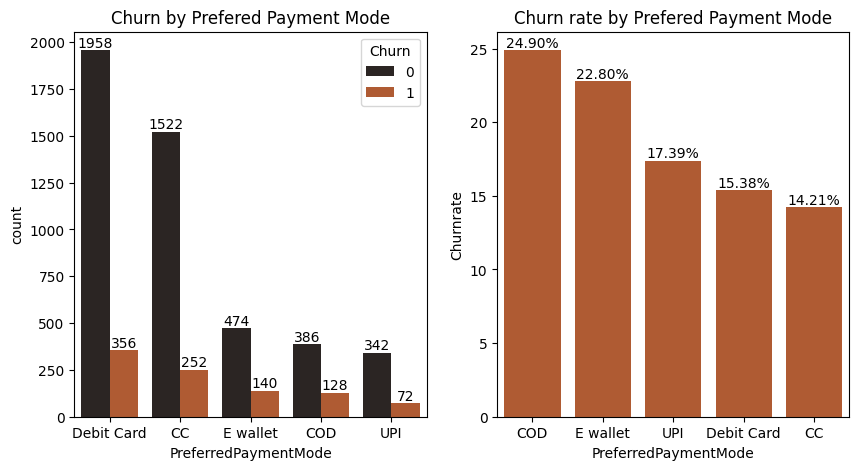

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ax=sns.countplot(data=df_clean, x='PreferredPaymentMode', hue='Churn', color='#c4541e', order=df_clean['PreferredPaymentMode'].value_counts().index)
for container in ax.containers:
       ax.bar_label(container)
plt.title('Churn by Prefered Payment Mode')
plt.subplot(1,2,2)
pm_bar=sns.barplot(data=payment_pivot , y='Churnrate', x='PreferredPaymentMode', color='#c4541e')
pm_bar.bar_label(pm_bar.containers[0], fmt='%.2f%%', fontsize=10)
plt.title('Churn rate by Prefered Payment Mode')

Pelanggan yang menggunakan metode pembayaran COD memiliki persentase churn yang paling tinggi sebesar 24.9%, oleh karena itu kita bisa memberikan saran kepada team marketing untuk memberikan promo pada pengguna yang menggunakan metode pembayaran COD.

#### **4. PreferedOrderCat**

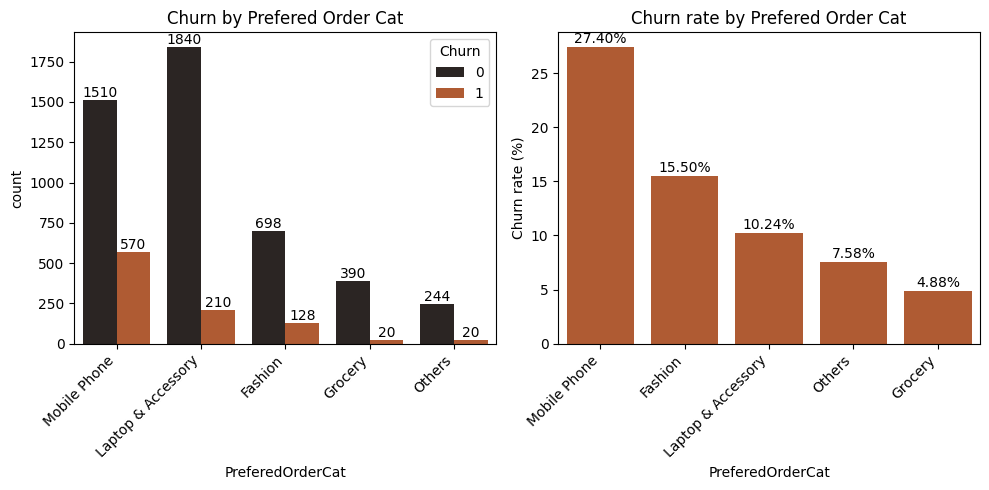

In [48]:
df_poc = df_clean.pivot_table(index='PreferedOrderCat', columns='Churn', values='CustomerID', aggfunc='count', fill_value=0)
df_poc['total'] = df_poc.sum(axis=1)
df_poc['Churnrate'] = df_poc.get(1, 0) / df_poc['total'] * 100
df_poc.sort_values('Churnrate', ascending=False, inplace=True)


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
poc=sns.countplot(data=df_clean, x='PreferedOrderCat', hue='Churn', color='#c4541e', order=df_clean['PreferedOrderCat'].value_counts().index)
for container in poc.containers:
       poc.bar_label(container)
plt.title('Churn by Prefered Order Cat')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
ax2 = sns.barplot(data=df_poc, x='PreferedOrderCat', y='Churnrate', errorbar=None, color='#c4541e')
for i, val in enumerate(df_poc['Churnrate']):
    ax2.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)

plt.ylabel('Churn rate (%)')
plt.xlabel('PreferedOrderCat')
plt.title('Churn rate by Prefered Order Cat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kategori dengan persentase churn tertinggi ada pada pengguna mobile phone di 27,40%. Disusul oleh kategori fashion di 15,50%, kemudian laptop & accessory 10,24% diambang batas churn sehat. Terakhir untuk kategori others & grocery keduanya memiliki persentase churn < 10%. Pelanggan cenderung berpotensi churn di kategori produk yang siklus pembelian tidak terlalu sering. Saran untuk team marketing bisa menggunakan strategi berupa pemberian caahback atau semacam poin untuk big purchase seperti pembelian mobile phone.

#### **5. SatisfactionScore**

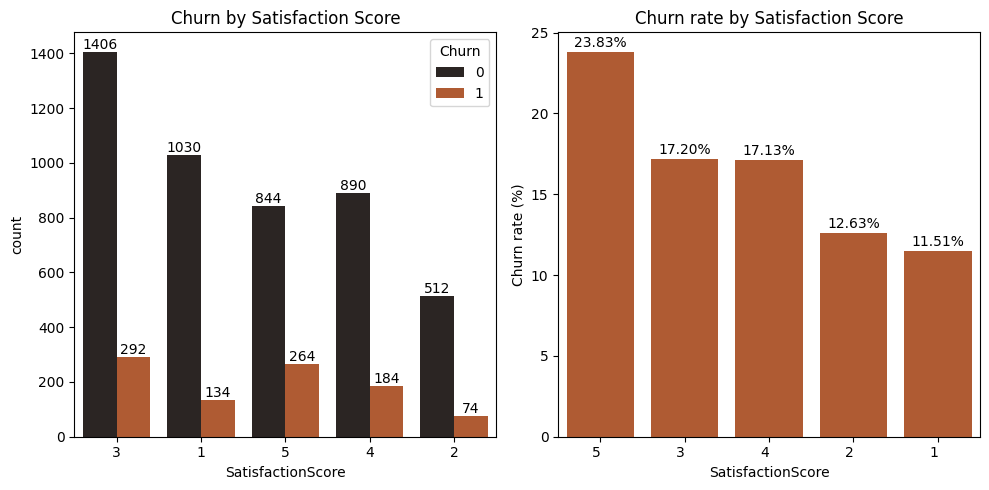

In [49]:
df_clean['Churn'] = df_clean['Churn'].astype(int)

df_pivot4 = df.pivot_table(index='SatisfactionScore', columns='Churn', values='CustomerID', aggfunc='count', fill_value=0)
df_pivot4['total'] = df_pivot4.sum(axis=1)
df_pivot4['Churnrate'] = df_pivot4.get(1, 0) / df_pivot4['total'] * 100
df_pivot4.sort_values('Churnrate', ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ss=sns.countplot(data=df_clean, x='SatisfactionScore', hue='Churn', color='#c4541e', order=df_clean['SatisfactionScore'].value_counts().index)
for container in ss.containers:
       ss.bar_label(container)
plt.title('Churn by Satisfaction Score')
plt.subplot(1,2,2)
ax2 = sns.barplot(data=df_pivot4, x='SatisfactionScore', y='Churnrate', errorbar=None, color='#c4541e', order=[5,3,4,2,1])

for i, val in enumerate(df_pivot4['Churnrate']):
    ax2.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)

plt.ylabel('Churn rate (%)')
plt.xlabel('SatisfactionScore')
plt.title('Churn rate by Satisfaction Score')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

Temuan ini cukup menarik karena persentase churn tertinggi justru berada pada skor 5. Meskipun pelanggan puas, namun tetap churn. Kita akan coba cek lebih lanjut kategori barang apa yang terbanyak dibeli pelanggan yang memberi skor 5.

##### Churn Rate by PreferedOrderCat vs. SatisfactionScore

In [50]:
# Hitung churn rate per-kombinasi SatisfactionScore & PreferedOrderCat
churn_summary = (df_clean.groupby(['SatisfactionScore', 'PreferedOrderCat'])['Churn'].mean().mul(100).reset_index(name='ChurnRate')
                 .sort_values(['SatisfactionScore', 'ChurnRate'], ascending=[True, False]))

print(churn_summary.to_string(index=False))

 SatisfactionScore   PreferedOrderCat  ChurnRate
                 1       Mobile Phone  18.660287
                 1            Fashion  15.476190
                 1 Laptop & Accessory   5.829596
                 1             Others   4.166667
                 1            Grocery   2.380952
                 2            Fashion  20.930233
                 2       Mobile Phone  19.444444
                 2             Others   9.090909
                 2 Laptop & Accessory   4.716981
                 2            Grocery   4.000000
                 3       Mobile Phone  27.476038
                 3 Laptop & Accessory  13.418530
                 3            Fashion   9.836066
                 3            Grocery   7.407407
                 3             Others   4.255319
                 4       Mobile Phone  27.884615
                 4            Fashion  13.698630
                 4             Others  12.903226
                 4 Laptop & Accessory   9.890110
                 4  

Hampir semua rating (1-5) memiliki top churner dari pelanggan yang membeli produk kategori mobile phone. Namun persentase churn berdasarkan pelanggan yang memberi rating 5 (puas) pada kategori mobile phone mencapai tingkat tertinggi di 40.09%. Ini masuk akal karena mobile phone bukanlah barang kebutuhan primer, dan rata-rata orang membelinya dalam kurun waktu 2-3tahun sekali, atau bahkan 4-5 tahun sekali. Analisanya meskipun rating tinggi, karena pelanggan hanya menggunakan aplikasi ketika perlu membeli barang saja maka setelah itu saat tidak memerlukannya lagi akan churn. Saran untuk team marketing: Hal ini bisa diakali dengan strategi pemasaran penjualan barang-barang pendukung mobile phone seperti casing mobile phone, charger, headset, dan aksesoris pendukung lainnya dengan menggunakan iklan personalisasi pelanggan setelah membeli produk pada kategori mobile phone.

#### **6. Preferred Login Device**

In [51]:
df_pivot_pld=df_clean.pivot_table(index='PreferredLoginDevice', columns='Churn', values='Tenure', aggfunc=len)
df_pivot_pld['total']=df_pivot_pld.sum(axis=1)
df_pivot_pld['Churnrate']=df_pivot_pld[1]/df_pivot_pld['total']*100
df_pivot_pld.sort_values('Churnrate', ascending=False, inplace=True)
df_pivot_pld

Churn,0,1,total,Churnrate
PreferredLoginDevice,,,,
Computer,1310,324,1634,19.828641
Mobile Phone,3372,624,3996,15.615616


Text(0.5, 1.0, 'Churn rate by Prefered Login Device')

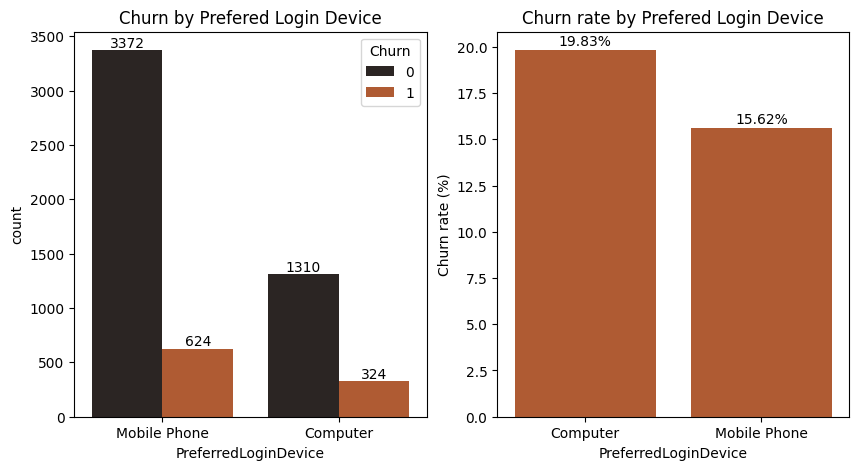

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
pld=sns.countplot(data=df_clean, x='PreferredLoginDevice', hue='Churn', color='#c4541e')
for container in pld.containers:
       pld.bar_label(container)
plt.title('Churn by Prefered Login Device')
plt.subplot(1,2,2)
a=sns.barplot(data=df_pivot_pld , y='Churnrate', x='PreferredLoginDevice', color='#c4541e')
for i, val in enumerate(df_pivot_pld['Churnrate']):
    a.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Prefered Login Device')

Terlihat churn rate di Preferred login device pada komputer dan mobile phone tidak jauh berbeda. makan akan dilakiukan z-test untuk membuktikan bahwa churn rate tidak berpengaruh terhadap kedua kategori tersebut.

In [53]:
from statsmodels.stats.proportion import proportions_ztest

count = df_pivot_pld[1].values
nobs = df_pivot_pld["total"].values

stat, pval = proportions_ztest(count, nobs)

print(f"Z-stat: {stat:.4f}, p-value: {pval:.4f}")
if pval > 0.05:
    print("Tidak ada bukti signifikan bahwa kategori mempengaruhi churn.")
else:
    print("Kategori berpengaruh signifikan terhadap churn.")

Z-stat: 3.8341, p-value: 0.0001
Kategori berpengaruh signifikan terhadap churn.


Berdasarkan analisis perbedaan proporsi, churn rate Computer (19,83%) secara signifikan lebih tinggi daripada Mobile Phone (15,62%) dengan selisih 4,21% (p-value = 0,0001). Meskipun perbedaan ini relatif kecil, ukuran populasi yang besar membuat hasil ini valid secara statistik. Dampak bisnisnya adalah potensi kehilangan pelanggan computer lebih besar, sehingga strategi retensi bisa diprioritaskan untuk kategori ini.

#### **7. Gender**

In [54]:
df_pivot_g= df_clean.pivot_table(index='Gender', columns='Churn', values='Tenure', aggfunc=len)
df_pivot_g['total']=df_pivot_g.sum(axis=1)
df_pivot_g['Churnrate']=df_pivot_g[1]/df_pivot_g['total']*100
df_pivot_g.sort_values('Churnrate', ascending=False, inplace=True)
df_pivot_g

Churn,0,1,total,Churnrate
Gender,,,,
Male,2784,600,3384,17.730496
Female,1898,348,2246,15.494212


Text(0.5, 1.0, 'Churn rate by Gender')

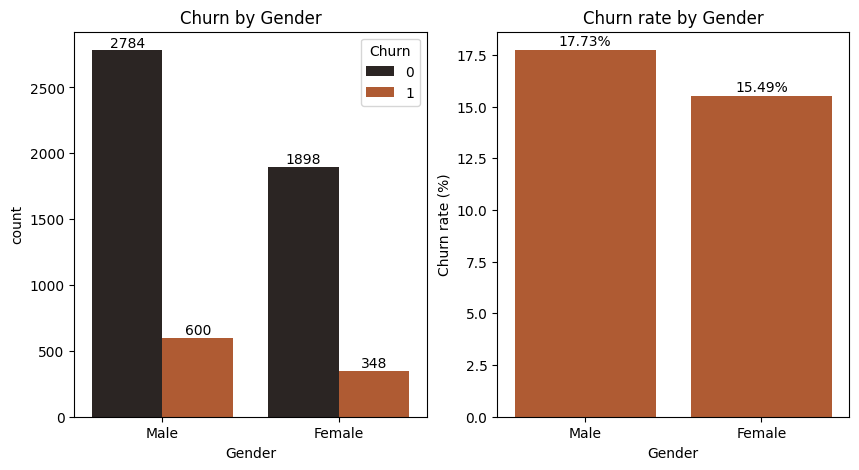

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
g=sns.countplot(data=df_clean, x='Gender', hue='Churn', color='#c4541e', order=df_clean['Gender'].value_counts().index)
for container in g.containers:
       g.bar_label(container)
plt.title('Churn by Gender')
plt.subplot(1,2,2)
b=sns.barplot(data=df_pivot_g , y='Churnrate', x='Gender', color='#c4541e')
for i, val in enumerate(df_pivot_g['Churnrate']):
    b.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Gender')

Terlihat churn rate pada Gender laki-laki dan  perempuann tidak jauh berbeda, maka akan dilakiukan z-test untuk membuktikan bahwa churn rate tidak berpengaruh terhadap kedua kategori tersebut.

In [56]:
count = df_pivot_g[1].values
nobs = df_pivot_g["total"].values

stat, pval = proportions_ztest(count, nobs)

print(f"Z-stat: {stat:.4f}, p-value: {pval:.4f}")
if pval > 0.05:
    print("Tidak ada bukti signifikan bahwa kategori mempengaruhi churn.")
else:
    print("Kategori berpengaruh signifikan terhadap churn.")

Z-stat: 2.1957, p-value: 0.0281
Kategori berpengaruh signifikan terhadap churn.


Berdasarkan analisis perbedaan proporsi, churn rate laki-laki (17,73%) secara signifikan lebih tinggi daripada perempuan (15,49%) dengan selisih 2,24% (p-value = 0,028). Meskipun perbedaan ini relatif kecil, ukuran populasi yang besar membuat hasil ini valid secara statistik. Dampak bisnisnya adalah potensi kehilangan pelanggan laki-laki lebih besar, sehingga strategi retensi bisa diprioritaskan untuk kategori ini.

#### **8. Complain**

In [57]:
df_pivot_c= df_clean.pivot_table(index='Complain', columns='Churn', values='Tenure', aggfunc=len)
df_pivot_c['total']=df_pivot_c.sum(axis=1)
df_pivot_c['Churnrate']=df_pivot_c[1]/df_pivot_c['total']*100
df_pivot_c.sort_values('Churnrate', ascending=False, inplace=True)
df_pivot_c

Churn,0,1,total,Churnrate
Complain,,,,
1,1096,508,1604,31.670823
0,3586,440,4026,10.928962


Text(0.5, 1.0, 'Churn rate by Complain')

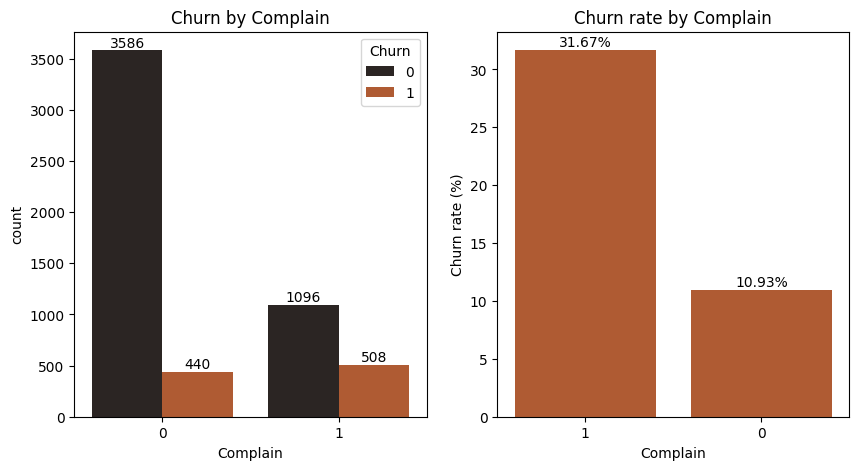

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
c=sns.countplot(data=df_clean, x='Complain', hue='Churn', color='#c4541e')
for container in c.containers:
       c.bar_label(container)
plt.title('Churn by Complain')
plt.subplot(1,2,2)
b=sns.barplot(data=df_pivot_c, y='Churnrate', x='Complain', color='#c4541e', order=[1,0])
for i, val in enumerate(df_pivot_c['Churnrate']):
    b.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Complain')

Terlihat secara signifikan pelanggan yang complain cenderung akan churn dengan persentase sebesar 31.67%, oleh karena itu kita bisa sarankan kepada team terkait untuk meningkatkan kualitas pelayanan kepada pelanggan. Berdasarkan [sumber](https://mitracomm.com/pelayanan-prima/), dengan pelayanan yang baik dan prima dapat meningkatkan kepuasan dan loyalitas pelanggan.

## **Feature Engineering**

### Encoding

Kolom citytier dan satisfation score tidak di encoding karena sudah berbentuk angka dan sudah ordinal, sehingga akan diubah tipenya saja.

In [59]:
df_clean['CityTier']=df_clean['CityTier'].astype(int)
df_clean['SatisfactionScore']=df_clean['SatisfactionScore'].astype(int)
df_clean['Complain']=df_clean['Complain'].astype(int)

encodingakan dilakukan pada kolom PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus karena masih berbentuk kategori.

encoding menggunakan one hot encoder karena kolom tersebut bukan berupa ordinal.

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
cols_ohe=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
cols_prep = Pipeline([("ohe", OneHotEncoder())])
trfm = ColumnTransformer([("onehot", cols_prep, cols_ohe)],remainder="passthrough")

## **Data Splitting**

In [61]:
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.utils import compute_class_weight
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

Sebelum feature selection akan dipisah dulu fitur dan labelnya.

kolom Costumer ID dihapus karena tidak dipakai dalam pembuatan model.

In [62]:
X=df_clean.drop(columns=['CustomerID', 'Churn'])
y=df_clean['Churn']

### Train-Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## **Modeling**

model yang akan di cross validation adalah :
- Logistic Regression
- KNN
- Decision Tree
- Random Forest
- XGBoost

In [64]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

### Baseline Models

Cross Validation dibagi 5

In [65]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2042)

cross validation setiap model

In [66]:
for name, model in models.items():
    pipe = Pipeline([
        ("ecd", trfm),
        ("mdl", model)
    ])
    print(f"\n{name}")
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='recall')
    scores2 = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='f1')
    print(f'std score {name} : recall = {scores.std()}, f1-score = {scores2.std()}' )
    print(f'mean score {name} : recall = {scores.mean()}, f1-score = {scores2.mean()}')



Logistic Regression
std score Logistic Regression : recall = 0.04849615512653786, f1-score = 0.03692973246175742
mean score Logistic Regression : recall = 0.5144388288602301, f1-score = 0.6083683398554701

KNN
std score KNN : recall = 0.027389095512821253, f1-score = 0.03557038643607735
mean score KNN : recall = 0.3839229696758452, f1-score = 0.4767989317102357

Decision Tree
std score Decision Tree : recall = 0.018450661654098297, f1-score = 0.02049042104844387
mean score Decision Tree : recall = 0.8087225514116417, f1-score = 0.8196838156367072

Random Forest
std score Random Forest : recall = 0.03888586898509286, f1-score = 0.02812828467652544
mean score Random Forest : recall = 0.7703990937608922, f1-score = 0.8508322469366437

XGBoost
std score XGBoost : recall = 0.027737178429738055, f1-score = 0.015807902534999647
mean score XGBoost : recall = 0.8377396305332869, f1-score = 0.8757294014001025


Model yang akan digunakan untuk perbandingan class imbalance handling adalah Decision Tree atau XGBoost karena menunjukkan hasil yang cukup seimbang antara recall dengan f1-score. Dengan standard deviasi baik dan mean terbaik.

Setelah itu kita akan melihat apakah data training memiliki label yang seimbang.

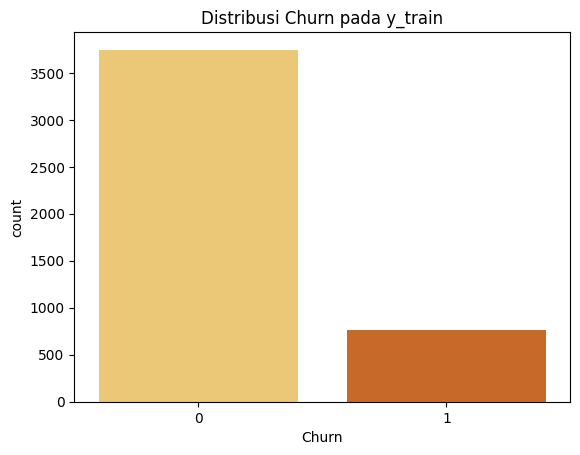

In [67]:
y_train_df=pd.DataFrame(y_train)
sns.countplot(data=y_train_df, x='Churn', palette="YlOrBr")
plt.title('Distribusi Churn pada y_train')
plt.show()

Dari chart di atas terlihat bahwa data training memiliki label yang sangat tidak seimbang. Sehingga kita akan membandingkan beberapa cara imbalanced handling untuk menentukan model terbaik berdasarkan imbalanced handlingnya juga.

In [68]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

results = {method_name: {} for method_name in ['No Handling', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler']}
methods = {
        'No Handling': None,
        'SMOTE': SMOTE(random_state=42),
        'RandomOverSampler': RandomOverSampler(random_state=42),
        'RandomUnderSampler': RandomUnderSampler(random_state=42)}
models_test = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}
for method_name, sampler in methods.items():
        for model_name, model in models_test.items():
            steps = []
            steps.append(('ecd', trfm))
            steps.append(('sampler', sampler))
            steps.append(('classifier', model))
            pipeline = Pipeline(steps=steps)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
            cv_scores_r = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
            mean_f1_score = cv_scores.mean().round(4)
            mean_recall = cv_scores_r.mean().round(4)
            results[method_name][model_name] = [mean_f1_score, mean_recall]

results_df_pipeline = pd.DataFrame(results)
results_df_pipeline.T.round(4)

,Decision Tree,XGBoost
No Handling,"[0.8197, 0.8087]","[0.8757, 0.8377]"
SMOTE,"[0.7844, 0.7902]","[0.8757, 0.843]"
RandomOverSampler,"[0.8146, 0.8048]","[0.8944, 0.8905]"
RandomUnderSampler,"[0.6432, 0.8799]","[0.7514, 0.9195]"


Disini dilakukan perbandingan antara model Decision Tree & XGBoost dengan metode-metode penanganan imbalance. Ketika model menggunakan data asli tanpa balancing, model XGBoost memiliki F1-Score di 0.87 dan recall 0.83 yang lebih baik dibandingkan dengan Decision Tree di F1-0.819 dan Recall 0.808.

Kemudian dari dua model ini dilakukan perbandingan evaluasi dengan balancing menggunakan SMOTE, RandomOverSampler, dan RandomUnderSampler.

Ketika menggunakan SMOTE, nilai F1 Score dan Recall menurun di kedua model. Hal ini dapat diartikan bahwa SMOTE kurang efektif jika digunakan.  

Untuk RandomOverSampler, pada XGBoost nilai F1-Score meningkat menjadi  0.89 dan Recall 0.89. Dibandingkan dengan Decision Tree yang turun menjadi F1 0.81 dan Recall 0.80. Model XGBoost dengan RandomOverSampler terbukti kinerjanya meningkat signifikan dan terbaik dibandingkan SMOTE dan RandomUnderSampler.

RandomUnderSampler pada model Decision Tree dan XGBoost nilai F1-Score menurun drastis, sedangkan recall meningkat.




### **Base Model**

kita memilih model xgboost, selanjutnya melihat hasil awal xgboost sebelum dituning.

In [69]:
pipe = Pipeline(steps=[
    ("transform", trfm),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", XGBClassifier(random_state=42))
])
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
print('f1-score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))

f1-score :  0.9739583333333334
recall :  0.9842105263157894


### **Hyperparameter Tuning**

sekarang kita akan melakukan tuning menggunakan random search dengan menggunakan parameter :
- n estimators : jumlah pohon, semakin besar nilainya model bisa belajar pola lebih kompleks (risiko overfit & waktu naik).
- learning rate : langkah pembelajaran per pohon,
- max depth : kedalaman maksimum pohon
- min child weight : minimum “berat”/jumlah data efektif di daun
- gamma : minimum penurunan loss agar split terjadi
- subsample : proporsi baris (sampel) per pohon
- colsample_bytree : proporsi fitur per pohon

In [70]:
hp_pipe = Pipeline(steps=[
    ("transform", trfm),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", XGBClassifier(random_state=42))
])
param_dist = {
    "model__n_estimators":     [300, 500, 700, 900],
    "model__learning_rate":    [0.02, 0.03, 0.05, 0.07, 0.1],
    "model__max_depth":        [3, 4, 5, 6, 7, 8],
    "model__min_child_weight": [1, 3, 5, 8, 12],
    "model__gamma":            [0.0, 0.1, 0.2, 0.4, 1.0],
    "model__subsample":        [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
}
scoring = {
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}
search = RandomizedSearchCV(
    estimator=hp_pipe,
    param_distributions=param_dist,
    n_iter=200,
    scoring=scoring,
    refit='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train, y_train)

results_df = pd.DataFrame(search.cv_results_)
print(results_df[['mean_test_recall', 'mean_test_f1', 'params']].sort_values(by='mean_test_recall', ascending=False).head(5))
print("\nBest Params:", search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
     mean_test_recall  mean_test_f1  \
69   0.897090          0.846777       
159  0.897081          0.876692       
92   0.897072          0.890441       
45   0.895783          0.858482       
29   0.895774          0.889285       

                                                                                                                                                                                            params  
69   {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__min_child_weight': 5, 'model__max_depth': 5, 'model__learning_rate': 0.07, 'model__gamma': 0.2, 'model__colsample_bytree': 0.8}  
159  {'model__subsample': 0.9, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0.2, 'model__colsample_bytree': 0.8}   
92   {'model__subsample': 0.6, 'model__n_estimators': 900, 'model__min_child_weight': 3, 'model__max_depth': 8

Dari hasil parameter tuning terbaiknya adalah :
- subsample: 1
- n_estimators: 300
- min_child_weight: 1
- max_depth: 6
- learning_rate: 0.05
- gamma: 0.2
- colsample_bytree: 0.8

### **Model Evaluation**

Hasil model setelah menggunakan paramter terbaik saat hyperparameter tuning:

In [71]:
pipe_hasil = Pipeline(steps=[
    ("transform", trfm),
    ("oversample", RandomOverSampler(random_state=42)),
    ("model", XGBClassifier(subsample= 1, n_estimators= 300, min_child_weight= 1, max_depth= 6, learning_rate= 0.05, gamma= 0.2, colsample_bytree= 0.8, random_state=42))
])
pipe_hasil.fit(X_train,y_train)
y_pred = pipe_hasil.predict(X_test)
print('f1-score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))

f1-score :  0.9417721518987342
recall :  0.9789473684210527


Hasil dari hyperparameter tuning lebih jelek dibandingkan base model tanpa parameter, sehingga kita akan memakai base model tanpa parameter dibandingkan setelah tuning.

In [72]:
pipe = Pipeline(steps=[
    ("transform", trfm),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", XGBClassifier(random_state=42))
])
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
print('f1-score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))

f1-score :  0.9739583333333334
recall :  0.9842105263157894


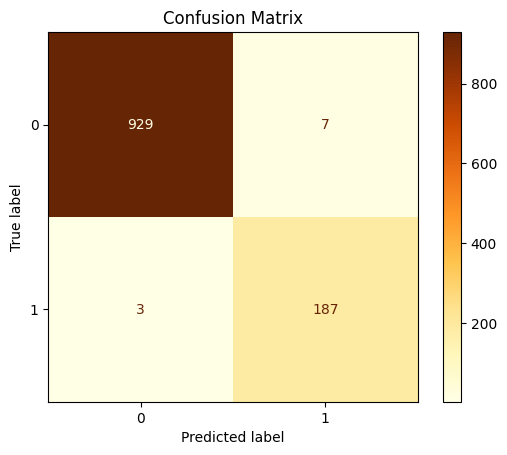

In [73]:
labels = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="YlOrBr")
plt.title('Confusion Matrix')
plt.show()

Arti tiap komponen :
- True Positive (TP = 187) → Model berhasil memprediksi churn dengan benar sebanyak 187 kasus.
- False Negative (FN = 3) → Ada 3 kasus churn yang salah diprediksi sebagai negatif (missed detection).
- False Positive (FP = 7) → Ada 7 kasus tidak churn yang salah diprediksi sebagai positif (false alarm).
- True Negative (TN = 929) → Model berhasil memprediksi tidak churn dengan benar sebanyak 929 kasus.

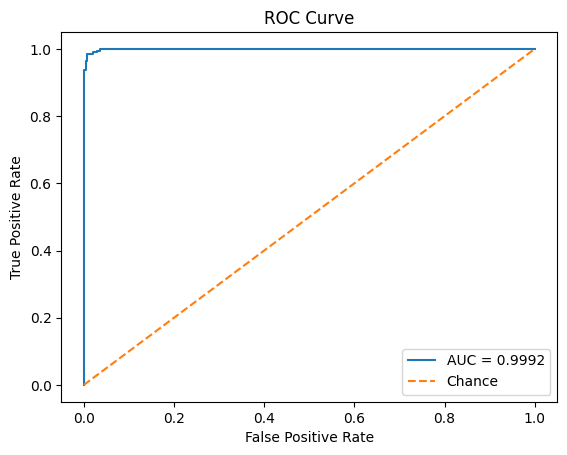

AUC-ROC: 0.999246513720198


In [74]:
if hasattr(pipe, "predict_proba"):
  y_score = pipe.predict_proba(X_test)[:, 1]
elif hasattr(pipe, "decision_function"):
  y_score = pipe.decision_function(X_test)
else:
  raise ValueError("Model tidak punya predict_proba/decision_function.")
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
print("AUC-ROC:", roc_auc_score(y_test, y_score))



ROC adalah grafik yang menunjukkan seberapa baik model bisa membedakan mana yang 'True' dan mana yang 'False' di semua kemungkinan batas keputusan. Kalau garisnya mendekati pojok kiri atas, berarti modelnya bagus. Angka AUC-nya semakin mendekati 1, berarti kemampuan semakin baik.

dari hasil di atas nilainya sangat bagus mendekati 1.

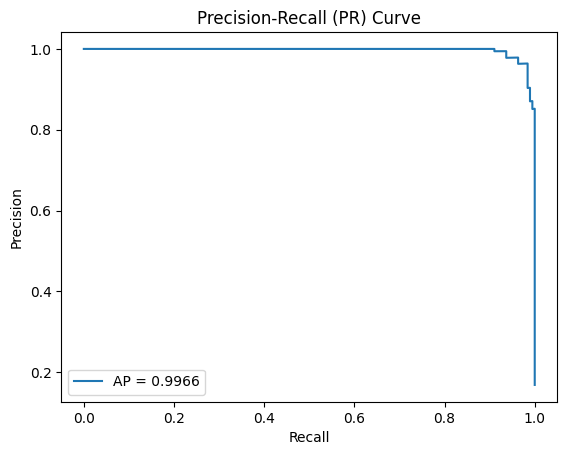

Average Precision (AUC-PR): 0.9965528403371107


In [75]:
if hasattr(pipe, "predict_proba"):
  y_score = pipe.predict_proba(X_test)[:, 1]
elif hasattr(pipe, "decision_function"):
  y_score = pipe.decision_function(X_test)
else:
  raise ValueError("Model tidak punya predict_proba/decision_function.")
precision, recall, _ = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label=f"AP = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall (PR) Curve")
plt.legend(loc="lower left")
plt.show()
print("Average Precision (AUC-PR):", ap)

PR Curve adalah grafik yang memperlihatkan trade-off antara berapa banyak yang kita tangkap (recall) dan berapa banyak dari yang kita tangkap itu benar (precision). Kalau garisnya tinggi di atas, berarti prediksi positif kita jarang salah. Cocok dipakai jika jumlah kasus 'True'-nya sedikit dibanding 'False'-nya.

AUC-PR itu angka yang bilang seberapa baik model kita dalam menemukan kasus penting tanpa terlalu banyak salah prediksi. Dari hasil di atas mendekati 1, artinya kita bisa menangkap banyak target dan tetap jarang salah.

## *XGBoost*

XGBoost adalah teknik yang menggabungkan banyak pohon keputusan kecil secara berurutan. Setiap pohon baru fokus memperbaiki kesalahan pohon-pohon sebelumnya.

cara menganalogikannya :
Bayangkan tim analis mengevaluasi pengajuan kredit. Analis 1 memberi keputusan awal (masih banyak salah). Analis 2 belajar dari kesalahan Analis 1 dan memperbaiki kasus yang salah. Analis 3 belajar dari sisa kesalahan, dan seterusnya. Akhirnya, gabungan penilaian mereka jauh lebih baik daripada satu analis saja.

XGBoost menggabungkan banyak keputusan sederhana secara bertahap, tiap langkah memperbaiki kesalahan langkah sebelumnya. Hasilnya akurat dan cepat, bagus untuk data pelanggan/transaksi. Kita juga bisa lihat fitur mana yang paling berpengaruh.



### *Interpretation*

Hasil model akan di interpretasi menngunakan SHAP.

### *Global Importance*

In [76]:
import shap

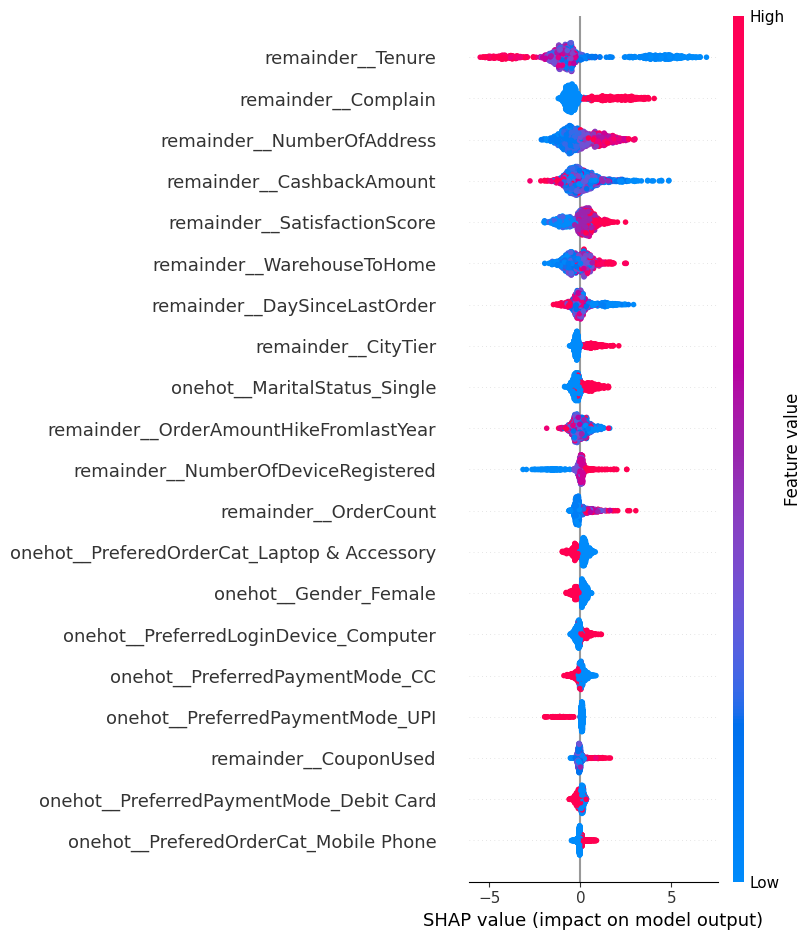

In [77]:
ct = pipe.named_steps["transform"]
model = pipe.named_steps["model"]

Xv = X_test
Xv_proc = ct.transform(Xv)
feat_names = list(ct.get_feature_names_out())

bg = Xv_proc if Xv_proc.shape[0] <= 2000 else shap.sample(Xv_proc, 1000, random_state=42)

explainer = shap.TreeExplainer(model, data=bg)
shap_vals = explainer.shap_values(Xv_proc)
base_val  = explainer.expected_value

shap.summary_plot(shap_vals, Xv_proc, feature_names=feat_names)

Tabel menunjukkan fitur yang paling berpengaruh terhadap model secara menurun.
perubahan pada fitur-fitur ini paling banyak menaikkan/menurunkan skor.

Penjelasan 5 fitur teratas :
- Tenure

Titik merah dominan di kiri = Tenure tinggi mengurangi probabilitas churn pada model ini. Semakin lama pelanggan menggunakan aplikasi maka cenderung untuk tidak churn.
- Complain

Titik merah dominan ke kanan = Complain yang 1 menambah probabilitas churn. Pelanggan yang complain akan cenderung churn.
- NumberOfAddress

Titik merah dominan di kanan = Alamat banyak menaikkan churn. Pelanggan yang banyak menambahkan alamat cenderung akan churn.
- CashbackAmount

Titik merah dominan di kiri = Cashback tinggi menurunkan churn. Semakin besar jumlah cashback yang didapat oleh pelanggan maka akan membuat pelanggan cenderung tidak churn, begitu juga sebaliknya.
- SatisfactionScore

Titik merah dominan di kanan = Kepuasan 5 menurunkan churn. Pelanggan yang memberikan nilai kepuasan 5 juga bisa cenderung untuk churn.

## Model Limitation

Model ini dibuat untuk memprediksi pelanggan yang berpotensi churn. Hasil model menunjukkan recall 98% dan f1-score 97%, oleh karena itu model tidak bisa 100% memprediksi pelanggan yang akan churn.

model ini juga mempunyai batasan, seperti :
- Batasan Data : Dilatih hanya dengan data ini, belum  mencangkup pelanggan pelanggan baru.

- Batasan Prediksi : Prediksi bisa bias pada segmen yang datanya jarang.

- Batasan Generalisasi : Hanya valid untuk e-commerce yang mirip dengan data training.

## **Save Best Model**

In [78]:
import pickle
filename = "trained_model.pkl"

with open(filename, "wb") as file:
    pickle.dump(pipe, file)

## **Conclusion**

### Model Summary

In [79]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       936
           1       0.96      0.98      0.97       190

    accuracy                           0.99      1126
   macro avg       0.98      0.99      0.98      1126
weighted avg       0.99      0.99      0.99      1126



Berdasarkan hasil classification report dari model yang telah dibuat, dapat disimpulkan bahwa jika nanti kita menggunakan model ini untuk memprediksi pelanggan yang berpotensi churn, maka model kita dapat mendeteksi 98% pelanggan yang kemungkinan akan churn dari seluruh pelanggan yang ada.

Selain itu, model ini memiliki ketepatan prediksi sebesar 96%. Hal tersebut dapat diartikan setiap model memprediksi bahwa seorang pengguna itu churn, maka kemungkinan prediksinya benar itu sebesar 96%.

### Business Impact

Sebelum menggunakan model, perusahaan kehilangan sekitar 948 pelanggan per tahun. Namun, jika menggunakan model kita dapat memprediksi 98% (berdasarkan Recall) atau sekitar 929 pelanggan yang berpotensi churn sehingga kita bisa berikan startegi marketing untuk retensi. Jika diasumsikan keberhasilan strategi yang diterapkan untuk retensi adalah 50%, maka dengan menggunakan model kita bisa mempertahankan sekitar 464 pelanggan.

Secara historis, akuisisi pelanggan bisa hingga 5x lebih mahal dibandingkan biaya untuk mempertahankan pelanggan yang sudah ada ([sumber](https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs?utm_source=chatgpt.com)).
Jika biaya akuisisi pelanggan atau Customer Acquisition Cost (CAC) sekitar Rp400.000 ([sumber](https://www.shopify.com/in/enterprise/blog/lower-customer-acquisition-costs?utm_source=chatgpt.com)), maka kita akan mengeluarkan biaya sekitar:
400.000 x 464 = Rp185.600.000 untuk akuisisi ulang pelanggan dari yang churn.

Sedangkan jika menggunakan model, dengan asumsi biaya retensi sebesar Rp100.000, perusahaan akan mengeluarkan biaya sebesar 100.000 x 464 = Rp46.400.000. Dengan begitu, perusahaan dapat menghemat biaya sebesar 185.600.000 - 46.400.000 = Rp139.200.000

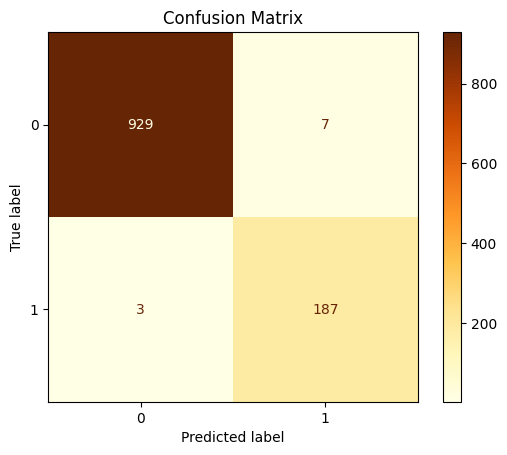

In [80]:
labels = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="YlOrBr")
plt.title('Confusion Matrix')
plt.show()

Berdasarkan hasil confusion matrix terlihat bahwa False Negative (FN) bernilai 3. Hal tersebut menandakan bahwa ada 3 pelanggan berpotensi churn yang tidak terdeteksi oleh model. Dampaknya perusahaan mengeluarkan biaya sebesar 400.000 x 3 = Rp1.200.000 untuk akuisisi ulang kembali yang disebabkan oleh missed detection model.

Sedangkan untuk False Positive (FP) bernilai 7, yang berarti bahwa ada 7 pelanggan yang tidak berpotensi churn namun terdeteksi churn oleh model. Dampaknya perusahaan mengeluarkan biaya sebesar 100.000 x 7 = Rp700.000 untuk biaya retensi pelanggan yang disebabkan oleh false alarm model.

### Recommendation

Berikut beberapa saran yang dapat dilakukan berdasarkan bisnis dan model

Bisnis:
- Melakukan strategi marketing dengan menggunakan insight dari data analisis, seperti memberikan voucher diskon kepada pelanggan baru yang durasi memakai aplikasi kurang dari 21 bulan. Nominal diskon bisa dipersonalisasi berdasarkan produk yang sering dibeli pelanggan.
- Berkolaborasi dengan team terkait membuat SOP standarisasi pelayanan untuk meningkatkan kualitas pelayanan pelanggan agar lebih baik dan prima terutama dalam menangani complain. Menurut [sumber](https://mitracomm.com/pelayanan-prima/), kualitas pelayanan yang baik dan prima dapat meningkatkan kepuasan dan loyalitas pelanggan.
- Membuat loyalty program seperti mengumpulkan poin yang bisa ditukarkan dengan cashback atau hadiah lainnya, semakin besar poin yang dimiliki maka semakin besar cashback atau semakin eksklusif hadiah yang bisa didapat.
- Menggunakan model yang dibuat untuk menentukan pelanggan yang akan diberi keuntungan lebih dalam hal mengurangi churn.

Model:
- Dikarenakan keterbatasan waktu yang kami punya menjadi alasan memakai metode randomized search saat hyperparameter tuning karena lebih ringan dan cepat prosesnya. Kedepannya mungkin bisa dicoba menggunakan metode grid search untuk hyperparameter tuning untuk hasil yang lebih optimal.
- Tambahkan fitur atau kolom-kolom baru yang bisa berhubungan dengan perilaku pelanggan seperti review dari pelanggan.
- Monitoring performa model secara terus-menerus setiap beberapa bulan, agar model selalu update dengan hasil yang lebih sesuai dengan keadaan sekarang.